In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
directory = 'C:/Users/a86963/Documents/data/ctd/19april2024/'

In [3]:
os.listdir(directory)

['VEI_X5733_240422183946_WEST_compensated.txt',
 'VEI_X5733_240422183946_WEST_compensated.xlsx',
 'VEI_X5733_240422184455_C.WEST_compensated.txt',
 'VEI_X5733_240422184455_C.WEST_compensated.xlsx',
 'VEI_X5733_240422184702_C.EAST_compensated.txt',
 'VEI_X5733_240422184702_C.EAST_compensated.xlsx',
 'VEI_X5733_240422184928_EAST_compensated.txt',
 'VEI_X5733_240422184928_EAST_compensated.xlsx']

In [3]:
ds_west= pd.read_csv(f"{directory}VEI_X5733_240422183946_WEST_compensated.txt", sep="\t") # indicates the delimiter
ds_c_west= pd.read_csv(f"{directory}VEI_X5733_240422184455_C.WEST_compensated.txt", sep="\t") 
ds_c_east= pd.read_csv(f"{directory}VEI_X5733_240422184702_C.EAST_compensated.txt", sep="\t") 
ds_east= pd.read_csv(f"{directory}VEI_X5733_240422184928_EAST_compensated.txt", sep="\t") 


In [ ]:
# drop the values at the beginning and end that are offering erroneous results, emaured outside of the water
ds_west = ds_west.drop(index=np.r_[0:10, 314:325]) # i determined this already by printing them, which ones needed to go, mainly by looking at salinity, since that has the least variance over the water column
ds_c_west = ds_c_west.drop(index=np.r_[0:5, 423:443])
ds_c_east = ds_c_east.drop(index=np.r_[0:4, 225:255])
ds_east = ds_east.drop(index=np.r_[0:7, 120:127])

In [23]:
ds_west['Conductivity_new'] = ds_west['Conductivity'] * (100 + 1.91 * (ds_west['Temperature'] - 25)) / 100
ds_c_west['Conductivity_new'] = ds_c_west['Conductivity'] * (100 + 1.91 * (ds_c_west['Temperature'] - 25)) / 100
ds_east['Conductivity_new'] = ds_east['Conductivity'] * (100 + 1.91 * (ds_east['Temperature'] - 25)) / 100
ds_c_east['Conductivity_new'] = ds_c_east['Conductivity'] * (100 + 1.91 * (ds_c_east['Temperature'] - 25)) / 100


In [13]:
ds_west
# test from: https://oceanlife.it/en/software-en/salinity-converter.html
# using the temp and new conductivity, we get 29.5 salinity
# and when i do it with the original salinity, i get 35.6

,MonitoringPoint,TimeStamp,Pressure,Temperature,Conductivity,Salinity,Conductivity_new
10,VEI_X5733,2024/04/19 10:54:30,10.493000,16.883333,45.476,35.546116,38.425932
11,VEI_X5733,2024/04/19 10:54:31,10.546750,16.883333,45.468,35.539056,38.419172
12,VEI_X5733,2024/04/19 10:54:32,10.668583,16.883333,45.712,35.754380,38.625345
13,VEI_X5733,2024/04/19 10:54:33,10.657833,16.890000,45.788,35.815360,38.695393
14,VEI_X5733,2024/04/19 10:54:34,10.890750,16.883333,45.408,35.486107,38.368473
...,...,...,...,...,...,...,...
309,VEI_X5733,2024/04/19 10:59:29,11.998000,16.976667,45.816,35.761037,38.794897
310,VEI_X5733,2024/04/19 10:59:30,11.822417,16.966667,45.848,35.798326,38.813236
311,VEI_X5733,2024/04/19 10:59:31,11.568000,16.976667,45.988,35.912503,38.940538
312,VEI_X5733,2024/04/19 10:59:32,11.148750,16.976667,45.416,35.408790,38.456195


In [5]:
# used manual, found the book that is referenced in the manual: file:///C:/Users/a86963/Documents/papers/The%20International%20thermodynamic%20equation%20of%20seawater,%202010_%20calculation%20and%20use%20of%20thermodynamic%20properties%20-%20UNESCO%20Digital%20Library.pdf
# and use this equation.https://salinometry.com/pss-78/

325

In [16]:
# taken without edit from https://github.com/TEOS-10/python-gsw/blob/master/gsw/gibbs/practical_salinity.py
a = (0.0080, -0.1692, 25.3851, 14.0941, -7.0261, 2.7081)
b = (0.0005, -0.0056, -0.0066, -0.0375, 0.0636, -0.0144)
c = (0.6766097, 2.00564e-2, 1.104259e-4, -6.9698e-7, 1.0031e-9)
d = (3.426e-2, 4.464e-4, 4.215e-1, -3.107e-3)
e = (2.070e-5, -6.370e-10, 3.989e-15)
k = 0.0162


def SP_from_C(C, t, p):
    """
    Calculates Practical Salinity, SP, from conductivity, C, primarily
    using the PSS-78 algorithm.  Note that the PSS-78 algorithm for Practical
    Salinity is only valid in the range 2 < SP < 42.  If the PSS-78 algorithm
    produces a Practical Salinity that is less than 2 then the Practical
    Salinity is recalculated with a modified form of the Hill et al. (1986)
    formula. The modification of the Hill et al. (1986) expression is to ensure
    that it is exactly consistent with PSS-78 at SP = 2.  Note that the input
    values of conductivity need to be in units of mS/cm (not S/m).

    Parameters
    ----------
    C : array
        conductivity [mS cm :sup:`-1`]
    t : array
        in-situ temperature [:math:`^\circ` C (ITS-90)]
    p : array
        sea pressure [dbar]
        (i.e. absolute pressure - 10.1325 dbar)

    Returns
    -------
    SP : array
         Practical Salinity [psu (PSS-78), unitless]


    References
    ----------
    .. [1] Culkin and Smith, 1980:  Determination of the Concentration of
       Potassium Chloride Solution Having the Same Electrical Conductivity, at
       15C and Infinite Frequency, as Standard Seawater of Salinity 35.0000
       (Chlorinity 19.37394), IEEE J. Oceanic Eng, 5, 22-23.

    .. [2] Hill, K.D., T.M. Dauphinee & D.J. Woods, 1986: The extension of the
       Practical Salinity Scale 1978 to low salinities. IEEE J. Oceanic Eng.,
       11, 109 - 112.

    .. [3] IOC, SCOR and IAPSO, 2010: The international thermodynamic equation
       of seawater - 2010: Calculation and use of thermodynamic properties.
       Intergovernmental Oceanographic Commission, Manuals and Guides No. 56,
       UNESCO (English), 196 pp.  Appendix E.

    .. [4] Unesco, 1983: Algorithms for computation of fundamental properties
       of seawater.  Unesco Technical Papers in Marine Science, 44, 53 pp.
    """

    C, t, p = np.broadcast_arrays(C, t, p, subok=True)

    t68 = t * 1.00024
    ft68 = (t68 - 15) / (1 + k * (t68 - 15))

    # The dimensionless conductivity ratio, R, is the conductivity input, C,
    # divided by the present estimate of C(SP=35, t_68=15, p=0) which is
    # 42.9140 mS/cm (=4.29140 S/m), (Culkin and Smith, 1980).

    R = 0.023302418791070513 * C  # 0.023302418791070513 = 1./42.9140

    # rt_lc corresponds to rt as defined in the UNESCO 44 (1983) routines.
    rt_lc = c[0] + (c[1] + (c[2] + (c[3] + c[4] * t68) * t68) * t68) * t68
    Rp = (1 + (p * (e[0] + e[1] * p + e[2] * p ** 2)) /
         (1 + d[0] * t68 + d[1] * t68 ** 2 + (d[2] + d[3] * t68) * R))
    Rt = R / (Rp * rt_lc)

    Rt[Rt < 0] = np.ma.masked
    Rtx = np.sqrt(Rt)

    SP = (a[0] + (a[1] + (a[2] + (a[3] + (a[4] + a[5] * Rtx) * Rtx) * Rtx) *
                  Rtx) * Rtx + ft68 *
          (b[0] + (b[1] + (b[2] + (b[3] + (b[4] + b[5] * Rtx) * Rtx) * Rtx) *
                   Rtx) * Rtx))

    # The following section of the code is designed for SP < 2 based on the
    # Hill et al. (1986) algorithm.  This algorithm is adjusted so that it is
    # exactly equal to the PSS-78 algorithm at SP = 2.

    I2, = np.nonzero(np.ravel(SP) < 2)
    if len(I2) > 0:
        Hill_ratio = Hill_ratio_at_SP2(t[I2])
        x = 400 * Rt[I2]
        sqrty = 10 * Rtx[I2]
        part1 = 1 + x * (1.5 + x)
        part2 = 1 + sqrty * (1 + sqrty * (1 + sqrty))
        SP_Hill_raw = SP[I2] - a[0] / part1 - b[0] * ft68[I2] / part2
        SP[I2] = Hill_ratio * SP_Hill_raw

    SP = np.maximum(SP, 0)  # Ensure that SP is non-negative.

    return SP

<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
C:\Users\a86963\AppData\Local\Temp\ipykernel_25368\264443790.py:11: SyntaxWarning: invalid escape sequence '\c'
  """


In [26]:
ds_west['Practical_Salinity'] = SP_from_C(ds_west['Conductivity_new'], ds_west['Temperature'], ds_west['Pressure'])
ds_c_west['Practical_Salinity'] = SP_from_C(ds_c_west['Conductivity_new'], ds_c_west['Temperature'], ds_c_west['Pressure'])
ds_c_east['Practical_Salinity'] = SP_from_C(ds_c_east['Conductivity_new'], ds_c_east['Temperature'], ds_c_east['Pressure'])
ds_east['Practical_Salinity'] = SP_from_C(ds_east['Conductivity_new'], ds_east['Temperature'], ds_east['Pressure'])


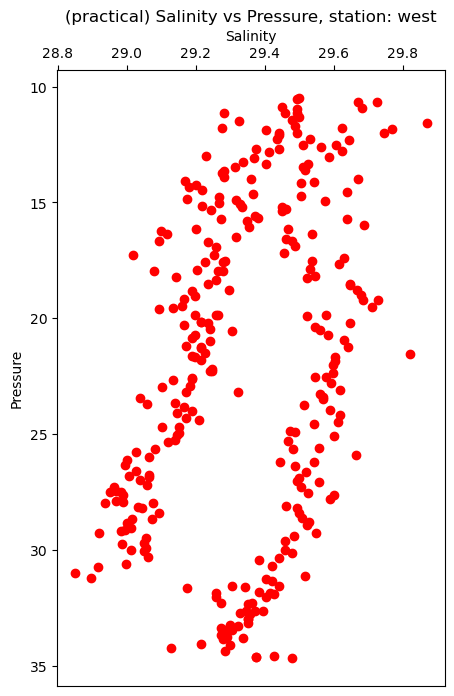

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(5, 8))

temp_data = ds_west['Temperature']
salinity_data = ds_west['Practical_Salinity']
pressure_data = ds_west['Pressure']

# Scatter plot for the first subplot
ax.scatter(salinity_data, pressure_data, color='red')
ax.set_xlabel('Salinity')
ax.set_ylabel('Pressure')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.invert_yaxis()
ax.set_title('(practical) Salinity vs Pressure, station: west')

plt.show()

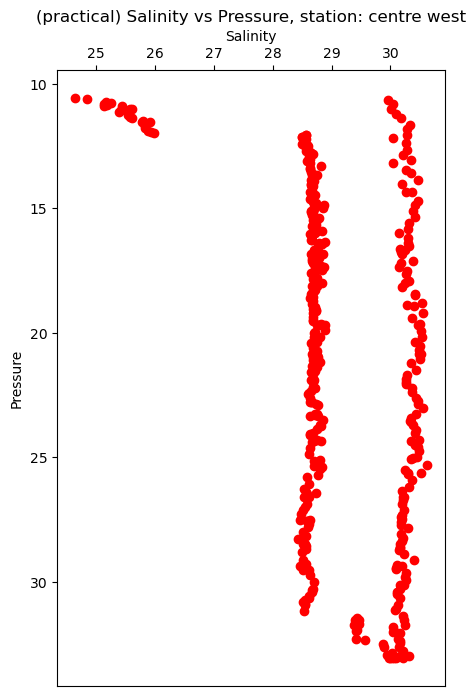

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(5, 8))

temp_data = ds_c_west['Temperature']
salinity_data = ds_c_west['Practical_Salinity']
pressure_data = ds_c_west['Pressure']

# Scatter plot for the first subplot
ax.scatter(salinity_data, pressure_data, color='red')
ax.set_xlabel('Salinity')
ax.set_ylabel('Pressure')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.invert_yaxis()
ax.set_title('(practical) Salinity vs Pressure, station: centre west')

plt.show()

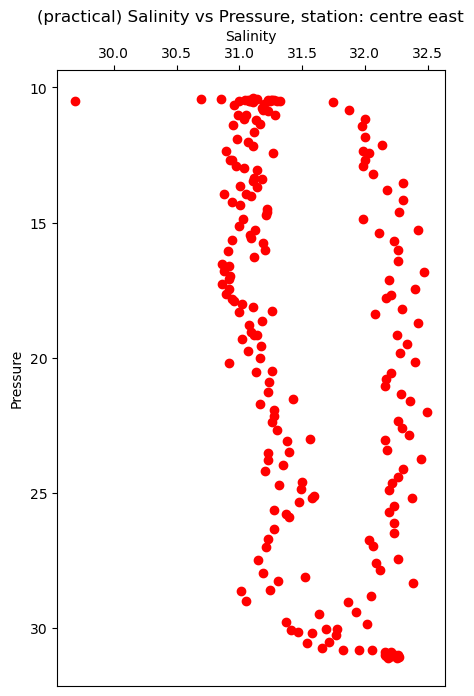

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(5, 8))

temp_data = ds_c_east['Temperature']
salinity_data = ds_c_east['Practical_Salinity']
pressure_data = ds_c_east['Pressure']

# Scatter plot for the first subplot
ax.scatter(salinity_data, pressure_data, color='red')
ax.set_xlabel('Salinity')
ax.set_ylabel('Pressure')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.invert_yaxis()
ax.set_title('(practical) Salinity vs Pressure, station: centre east')

plt.show()

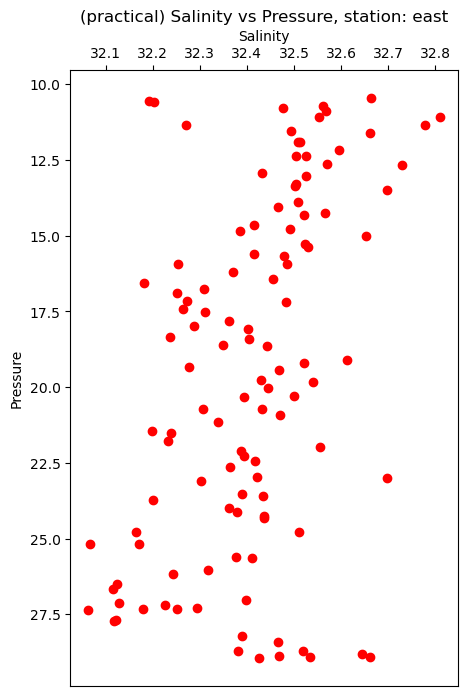

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(5, 8))

temp_data = ds_east['Temperature']
salinity_data = ds_east['Practical_Salinity']
pressure_data = ds_east['Pressure']

# Scatter plot for the first subplot
ax.scatter(salinity_data, pressure_data, color='red')
ax.set_xlabel('Salinity')
ax.set_ylabel('Pressure')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.invert_yaxis()
ax.set_title('(practical) Salinity vs Pressure, station: east')

plt.show()

In [ ]:
# this was the plots with my caluclations for new salinity based on my conductivityu measuremetns above. but they are now too low...
# now are the plots with the pre caluclated salinity, just to also compare. 

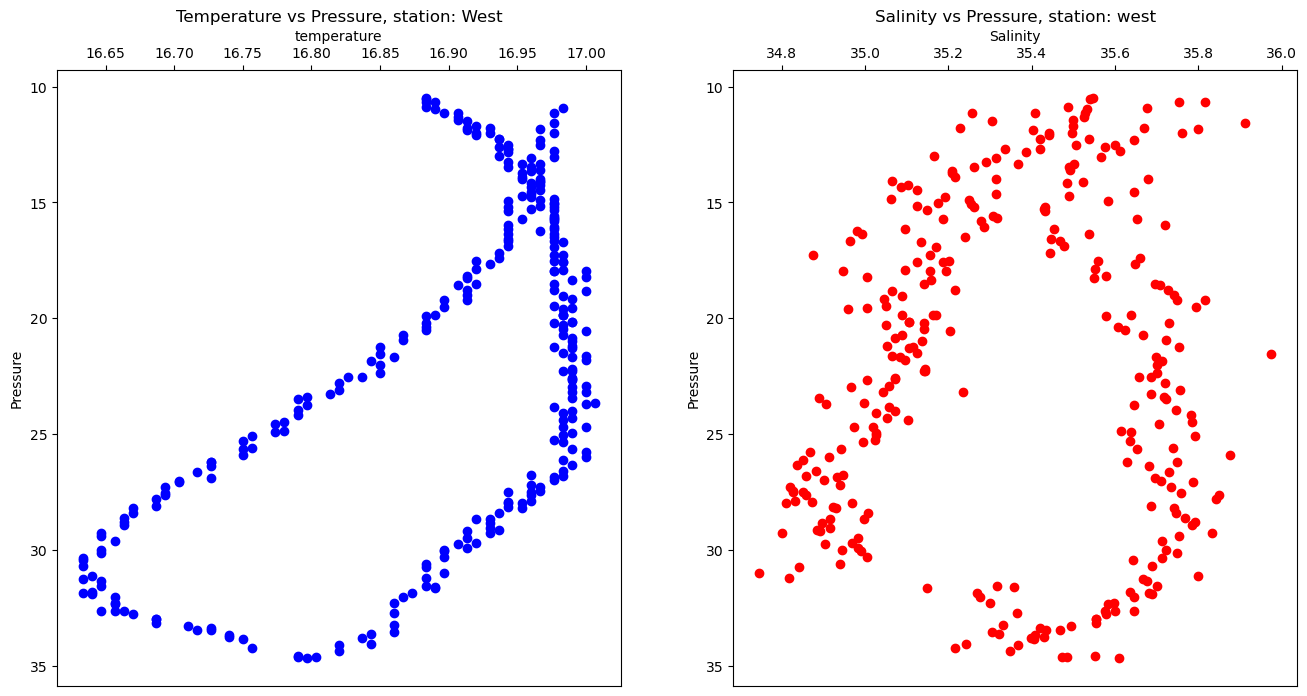

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

temp_data = ds_west['Temperature']
salinity_data = ds_west['Salinity']


pressure_data = ds_west['Pressure']

axs[0].scatter(temp_data, pressure_data, color='blue')
axs[0].set_xlabel('temperature')
axs[0].set_ylabel('Pressure')
axs[0].yaxis.set_ticks_position('left')  
axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].invert_yaxis()
axs[0].set_title('Temperature vs Pressure, station: West')


axs[1].scatter(salinity_data, pressure_data, color='red')
axs[1].set_xlabel('Salinity')
axs[1].set_ylabel('Pressure')
axs[1].yaxis.set_ticks_position('left')  
axs[1].xaxis.set_ticks_position('top')
axs[1].xaxis.set_label_position('top')  
axs[1].invert_yaxis()
axs[1].set_title('Salinity vs Pressure, station: west')


plt.show()

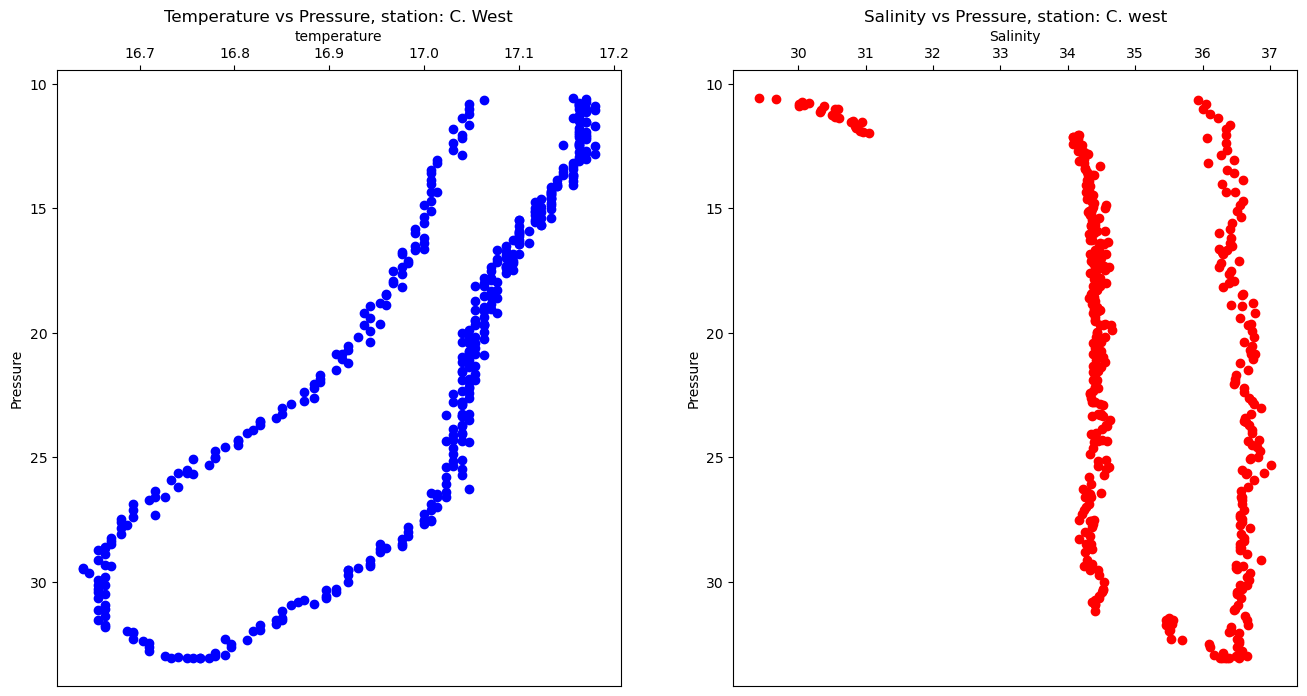

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

temp_data = ds_c_west['Temperature']
salinity_data = ds_c_west['Salinity']


pressure_data = ds_c_west['Pressure']

axs[0].scatter(temp_data, pressure_data, color='blue')
axs[0].set_xlabel('temperature')
axs[0].set_ylabel('Pressure')
axs[0].yaxis.set_ticks_position('left')  
axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].invert_yaxis()
axs[0].set_title('Temperature vs Pressure, station: C. West')


axs[1].scatter(salinity_data, pressure_data, color='red')
axs[1].set_xlabel('Salinity')
axs[1].set_ylabel('Pressure')
axs[1].yaxis.set_ticks_position('left')  
axs[1].xaxis.set_ticks_position('top')
axs[1].xaxis.set_label_position('top')  
axs[1].invert_yaxis()
axs[1].set_title('Salinity vs Pressure, station: C. west')


plt.show()

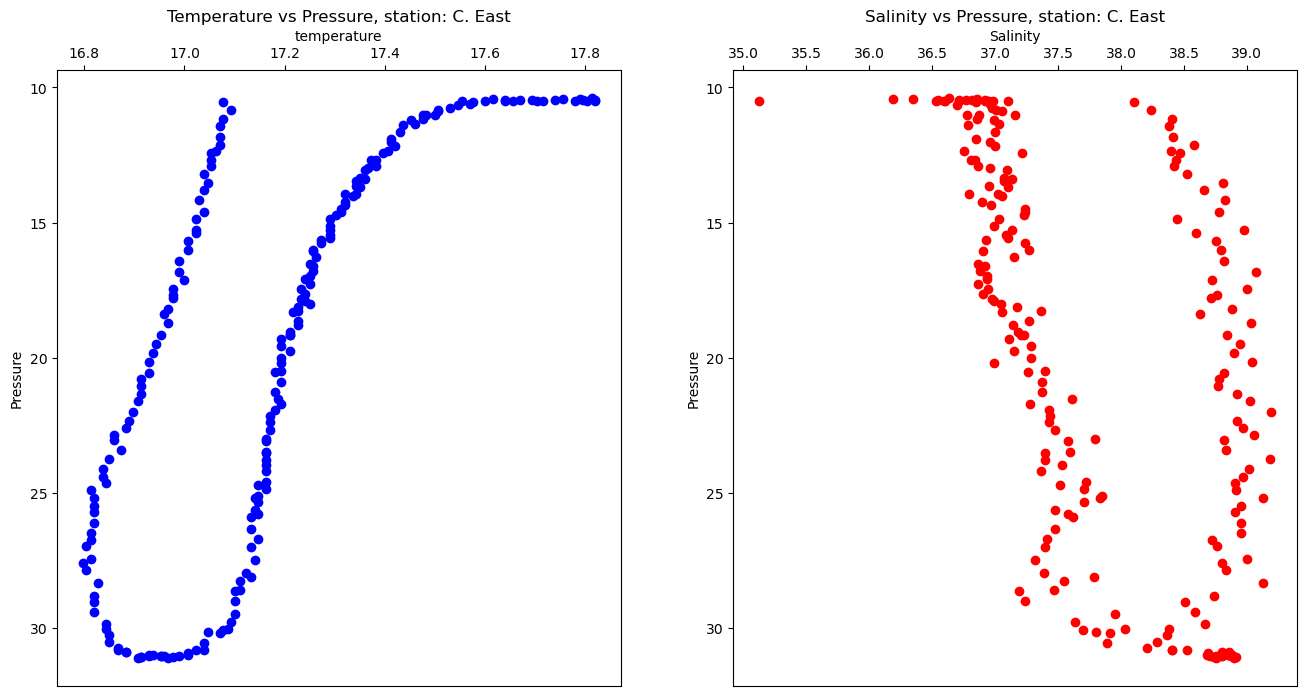

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

temp_data = ds_c_east['Temperature']
salinity_data = ds_c_east['Salinity']


pressure_data = ds_c_east['Pressure']

axs[0].scatter(temp_data, pressure_data, color='blue')
axs[0].set_xlabel('temperature')
axs[0].set_ylabel('Pressure')
axs[0].yaxis.set_ticks_position('left')  
axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].invert_yaxis()
axs[0].set_title('Temperature vs Pressure, station: C. East')


axs[1].scatter(salinity_data, pressure_data, color='red')
axs[1].set_xlabel('Salinity')
axs[1].set_ylabel('Pressure')
axs[1].yaxis.set_ticks_position('left')  
axs[1].xaxis.set_ticks_position('top')
axs[1].xaxis.set_label_position('top')  
axs[1].invert_yaxis()
axs[1].set_title('Salinity vs Pressure, station: C. East')


plt.show()

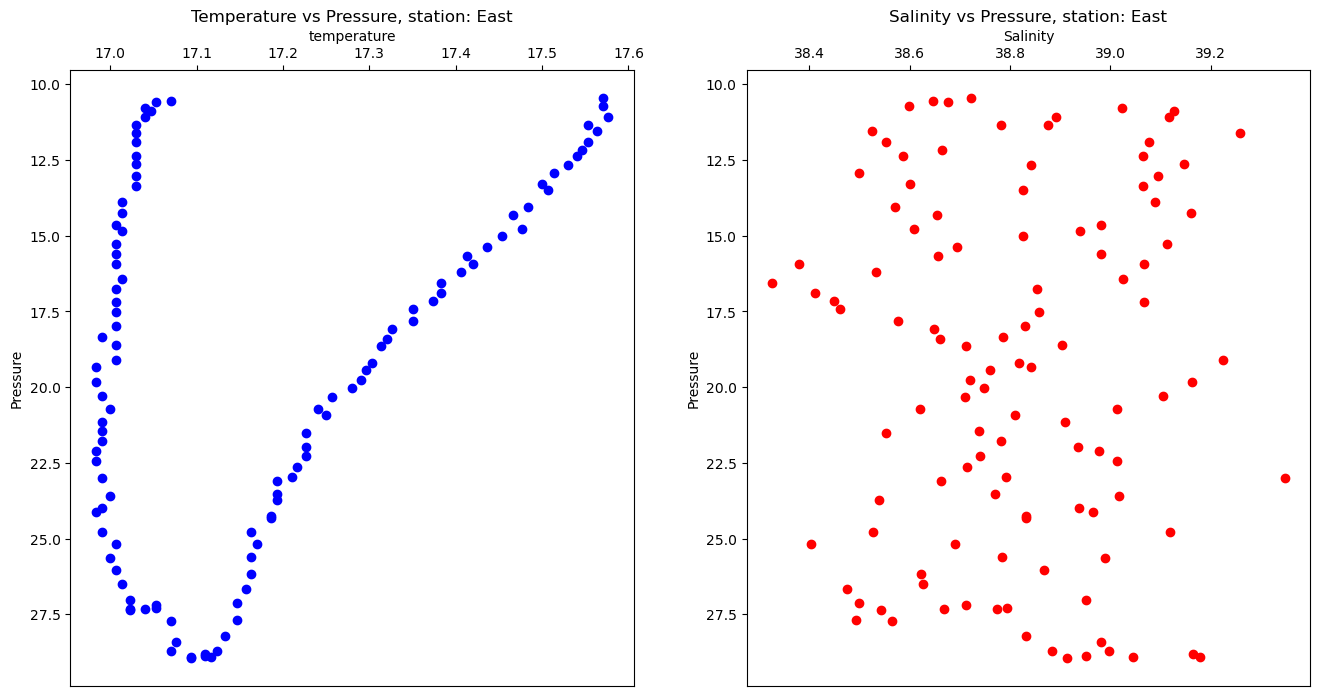

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

temp_data = ds_east['Temperature']
salinity_data = ds_east['Salinity']
pressure_data = ds_east['Pressure']

axs[0].scatter(temp_data, pressure_data, color='blue')
axs[0].set_xlabel('temperature')
axs[0].set_ylabel('Pressure')
axs[0].yaxis.set_ticks_position('left')  
axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].invert_yaxis()
axs[0].set_title('Temperature vs Pressure, station: East')


axs[1].scatter(salinity_data, pressure_data, color='red')
axs[1].set_xlabel('Salinity')
axs[1].set_ylabel('Pressure')
axs[1].yaxis.set_ticks_position('left')  
axs[1].xaxis.set_ticks_position('top')
axs[1].xaxis.set_label_position('top')  
axs[1].invert_yaxis()
axs[1].set_title('Salinity vs Pressure, station: East')


plt.show()

In [ ]:
# this is good, but lets seperated it for bottom up and surface down, to see the depth profile better:

In [61]:
max_pressure_index = ds_west['Pressure'].idxmax() # assumption: max pressure is deepest point, at which point it must start coming up again

west_surface_down = ds_west.iloc[:max_pressure_index]
west_bottom_up= ds_west.iloc[max_pressure_index:]

First half of the dataset:
    MonitoringPoint            TimeStamp   Pressure  Temperature  \
0         VEI_X5733  2024/04/19 10:54:20  10.367583    16.836667   
1         VEI_X5733  2024/04/19 10:54:21  10.378333    16.843333   
2         VEI_X5733  2024/04/19 10:54:22  10.371167    16.860000   
3         VEI_X5733  2024/04/19 10:54:23  10.367583    16.850000   
4         VEI_X5733  2024/04/19 10:54:24  10.371167    16.850000   
..              ...                  ...        ...          ...   
183       VEI_X5733  2024/04/19 10:57:23  34.067750    16.843333   
184       VEI_X5733  2024/04/19 10:57:24  34.085667    16.820000   
185       VEI_X5733  2024/04/19 10:57:25  34.340083    16.820000   
186       VEI_X5733  2024/04/19 10:57:26  34.590917    16.790000   
187       VEI_X5733  2024/04/19 10:57:27  34.619583    16.803333   

     Conductivity   Salinity  
0           1.040   0.613626  
1           1.124   0.665667  
2           1.036   0.610803  
3           1.028   0.605984  
4

In [95]:
max_pressure_index = ds_c_west['Pressure'].idxmax()

c_west_surface_down = ds_c_west.iloc[:max_pressure_index]
c_west_bottom_up= ds_c_west.iloc[max_pressure_index:]

In [96]:
max_pressure_index = ds_c_east['Pressure'].idxmax()

c_east_surface_down = ds_c_east.iloc[:max_pressure_index]
c_east_bottom_up= ds_c_east.iloc[max_pressure_index:]

In [97]:
max_pressure_index = ds_east['Pressure'].idxmax()

east_surface_down = ds_east.iloc[:max_pressure_index]
east_bottom_up= ds_east.iloc[max_pressure_index:]

In [85]:
west_surface_down = west_surface_down.drop(index=np.r_[0:10])#, 120:127]) # if necessary to run again..

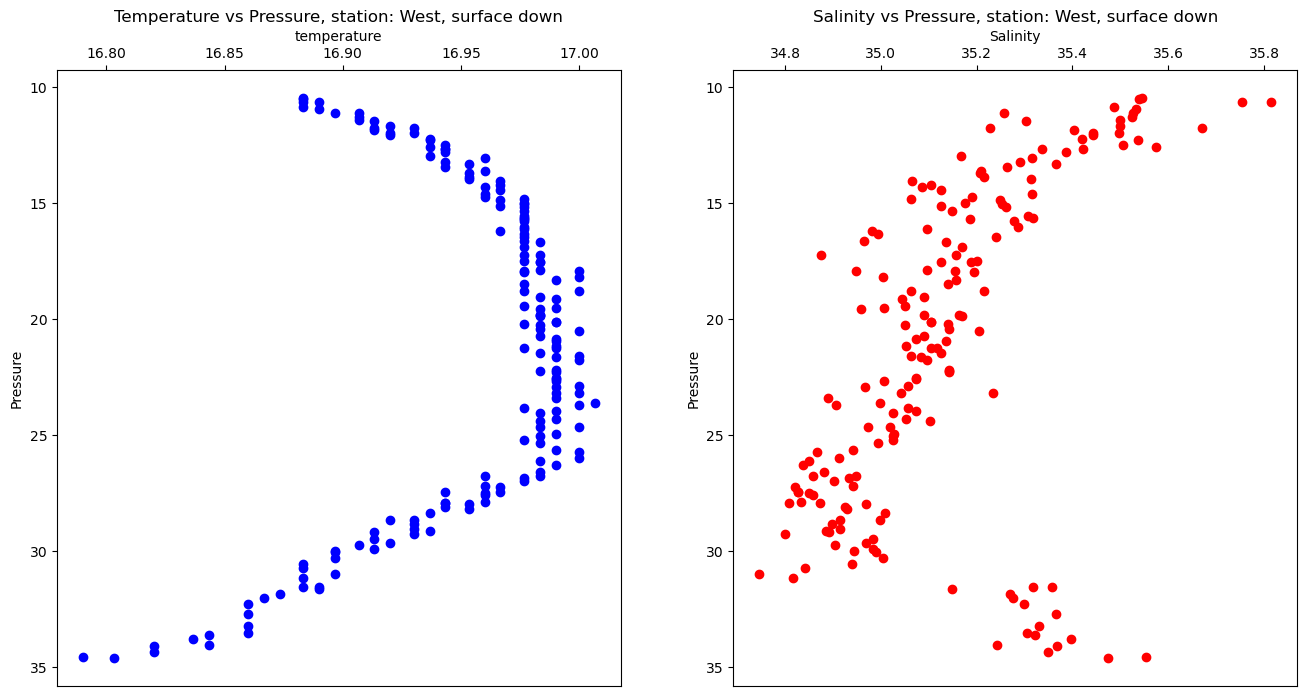

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

temp_data = west_surface_down['Temperature']
salinity_data = west_surface_down['Salinity']


pressure_data = west_surface_down['Pressure']

axs[0].scatter(temp_data, pressure_data, color='blue')
axs[0].set_xlabel('temperature')
axs[0].set_ylabel('Pressure')
axs[0].yaxis.set_ticks_position('left')  
axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].invert_yaxis()
axs[0].set_title('Temperature vs Pressure, station: West, surface down')


axs[1].scatter(salinity_data, pressure_data, color='red')
axs[1].set_xlabel('Salinity')
axs[1].set_ylabel('Pressure')
axs[1].yaxis.set_ticks_position('left')  
axs[1].xaxis.set_ticks_position('top')
axs[1].xaxis.set_label_position('top')  
axs[1].invert_yaxis()
axs[1].set_title('Salinity vs Pressure, station: West, surface down')


plt.show()

In [92]:
# WEST: temp and salinity more or less match. temp is a bit weird! but is also the first station we did, and we didnt let the sensor calibrate in the water first. so maybe thats why. 

188    35.610742
189    35.485929
190    35.215306
191    35.405431
192    35.428666
         ...    
320     1.521451
321     1.420650
322     1.601323
323     1.490200
324     0.207954
Name: Salinity, Length: 137, dtype: float64

In [93]:
west_bottom_up = west_bottom_up.drop(index=np.r_[314:325])#, 120:127])

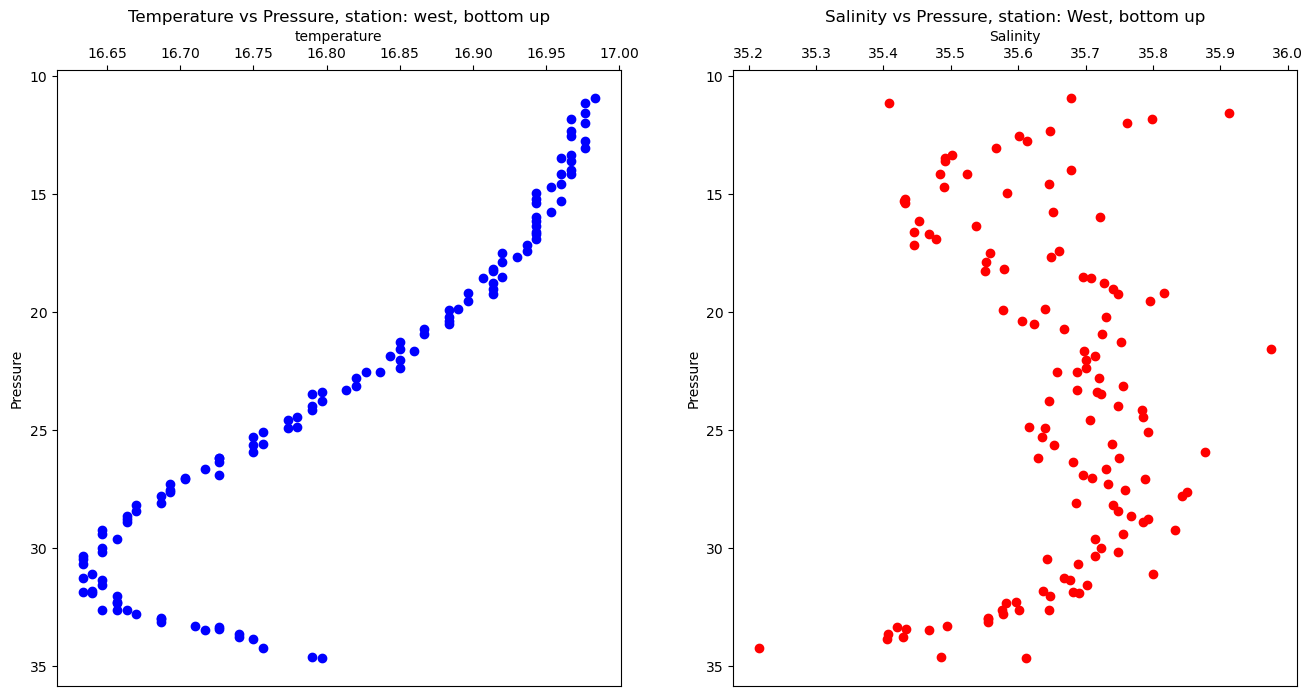

In [94]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

temp_data = west_bottom_up['Temperature']
salinity_data = west_bottom_up['Salinity']


pressure_data = west_bottom_up['Pressure']

axs[0].scatter(temp_data, pressure_data, color='blue')
axs[0].set_xlabel('temperature')
axs[0].set_ylabel('Pressure')
axs[0].yaxis.set_ticks_position('left')  
axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].invert_yaxis()
axs[0].set_title('Temperature vs Pressure, station: west, bottom up')


axs[1].scatter(salinity_data, pressure_data, color='red')
axs[1].set_xlabel('Salinity')
axs[1].set_ylabel('Pressure')
axs[1].yaxis.set_ticks_position('left')  
axs[1].xaxis.set_ticks_position('top')
axs[1].xaxis.set_label_position('top')  
axs[1].invert_yaxis()
axs[1].set_title('Salinity vs Pressure, station: West, bottom up')


plt.show()

In [100]:
# WEST: here, on the way up again, the sensor results are better; the sensor was probably used to the water at this pouint. 

279    36.337904
280    36.503503
281    36.582831
282    36.504868
283    36.536762
         ...    
418    36.224063
419    36.115945
420    36.010437
421    36.049123
422    35.931925
Name: Salinity, Length: 144, dtype: float64

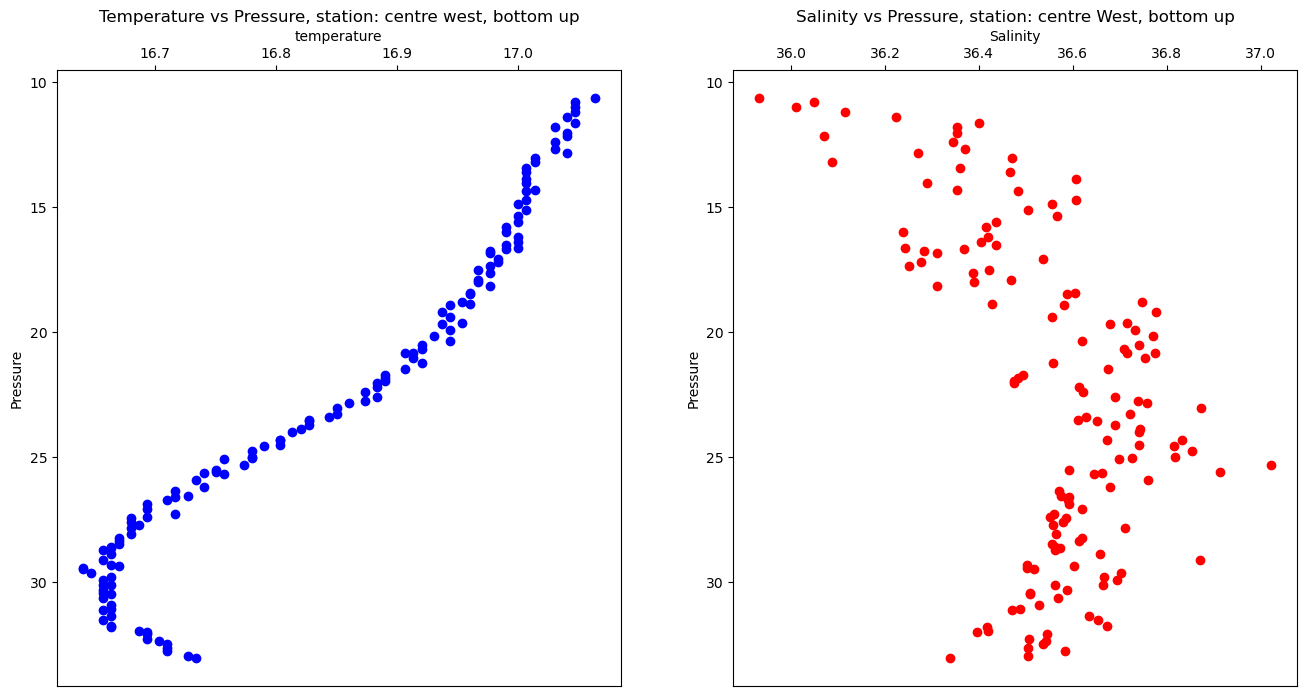

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

temp_data = c_west_bottom_up['Temperature']
salinity_data = c_west_bottom_up['Salinity']


pressure_data = c_west_bottom_up['Pressure']

axs[0].scatter(temp_data, pressure_data, color='blue')
axs[0].set_xlabel('temperature')
axs[0].set_ylabel('Pressure')
axs[0].yaxis.set_ticks_position('left')  
axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].invert_yaxis()
axs[0].set_title('Temperature vs Pressure, station: centre west, bottom up')


axs[1].scatter(salinity_data, pressure_data, color='red')
axs[1].set_xlabel('Salinity')
axs[1].set_ylabel('Pressure')
axs[1].yaxis.set_ticks_position('left')  
axs[1].xaxis.set_ticks_position('top')
axs[1].xaxis.set_label_position('top')  
axs[1].invert_yaxis()
axs[1].set_title('Salinity vs Pressure, station: centre West, bottom up')


plt.show()

In [ ]:
# CENTRE WEST: this one matches really nicely for temperature, and slightly overestimating salinity

In [118]:
c_west_surface_down['Salinity'][30] # only reaches the 35.5 salinity pretty late in the time series...not sure if right

12.1485

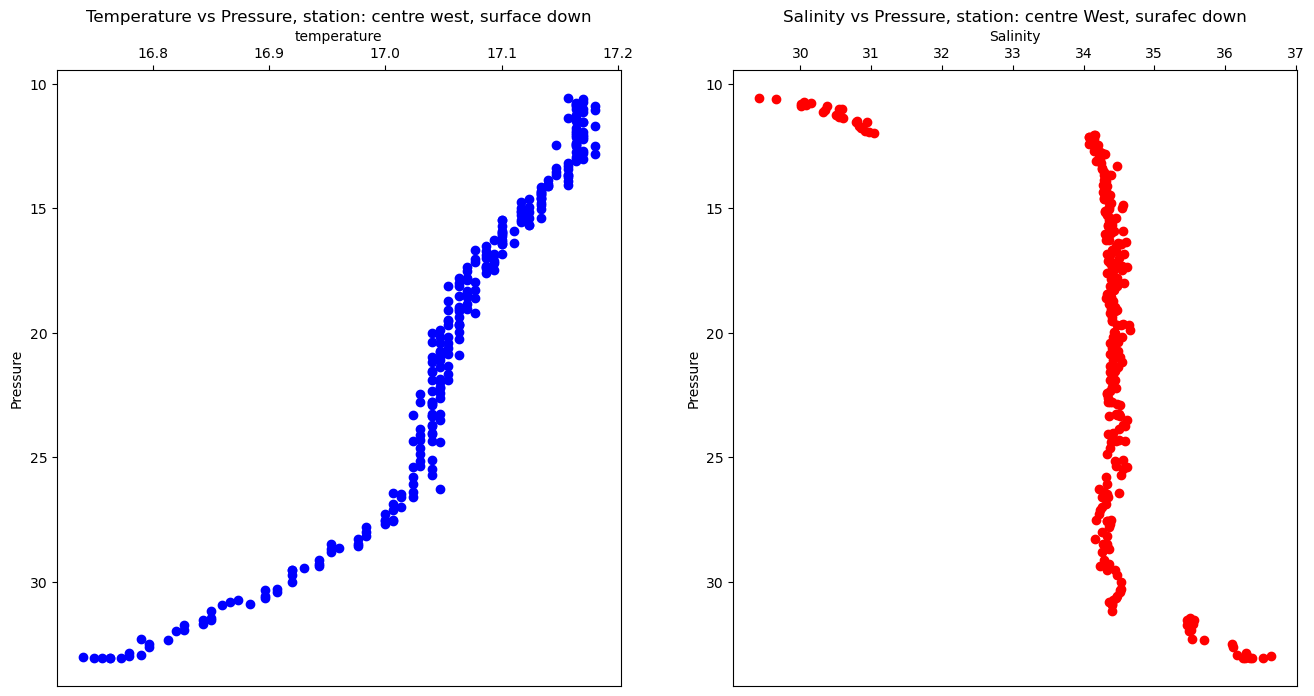

In [103]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

temp_data = c_west_surface_down['Temperature']
salinity_data = c_west_surface_down['Salinity']


pressure_data = c_west_surface_down['Pressure']

axs[0].scatter(temp_data, pressure_data, color='blue')
axs[0].set_xlabel('temperature')
axs[0].set_ylabel('Pressure')
axs[0].yaxis.set_ticks_position('left')  
axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].invert_yaxis()
axs[0].set_title('Temperature vs Pressure, station: centre west, surface down')


axs[1].scatter(salinity_data, pressure_data, color='red')
axs[1].set_xlabel('Salinity')
axs[1].set_ylabel('Pressure')
axs[1].yaxis.set_ticks_position('left')  
axs[1].xaxis.set_ticks_position('top')
axs[1].xaxis.set_label_position('top')  
axs[1].invert_yaxis()
axs[1].set_title('Salinity vs Pressure, station: centre West, surafec down')


plt.show()

In [ ]:
# CENTRE WEST : temperature mstches really nicely here, and salinity looks more or less underestimsted. hard to say, since theres a lot of points around 30 that feels wrong to delete since they change with pressure. 

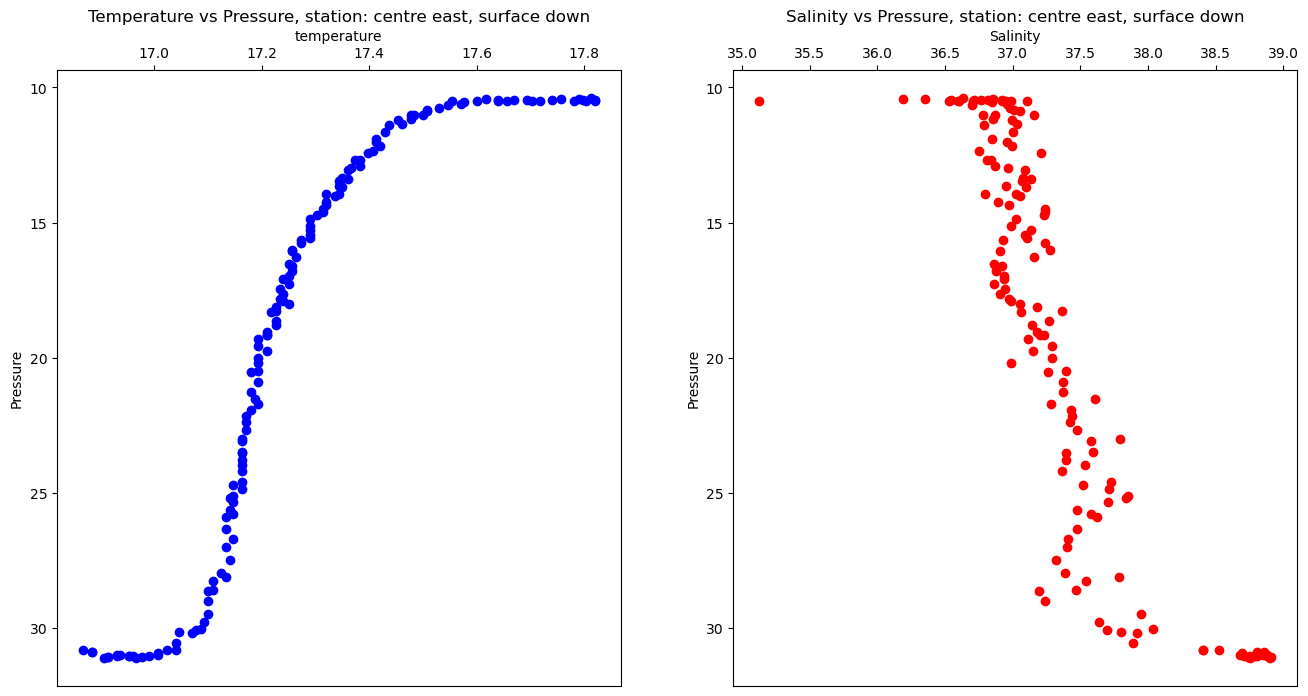

In [123]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

temp_data = c_east_surface_down['Temperature']
salinity_data = c_east_surface_down['Salinity']


pressure_data = c_east_surface_down['Pressure']

axs[0].scatter(temp_data, pressure_data, color='blue')
axs[0].set_xlabel('temperature')
axs[0].set_ylabel('Pressure')
axs[0].yaxis.set_ticks_position('left')  
axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].invert_yaxis()
axs[0].set_title('Temperature vs Pressure, station: centre east, surface down')


axs[1].scatter(salinity_data, pressure_data, color='red')
axs[1].set_xlabel('Salinity')
axs[1].set_ylabel('Pressure')
axs[1].yaxis.set_ticks_position('left')  
axs[1].xaxis.set_ticks_position('top')
axs[1].xaxis.set_label_position('top')  
axs[1].invert_yaxis()
axs[1].set_title('Salinity vs Pressure, station: centre east, surface down')


plt.show()

In [166]:
for index, value in enumerate(c_east_surface_down['Salinity']):
    if value < 36:
        print(f"Index: {index}, Value: {value}")


Index: 17, Value: 35.12519858


In [173]:
c_east_surface_down['Pressure']

5      10.475083
6      10.482250
7      10.389083
8      10.496583
9      10.460750
         ...    
152    31.115083
153    31.072083
154    30.903667
155    30.900083
156    30.814083
Name: Pressure, Length: 152, dtype: float64

In [ ]:
# CENTRE EAST : beautiful temperature graph, but seems to have wider range of values than is shown in the probe data. Salinity is way too high. This 35 at index 17 in the salinity is really weird..

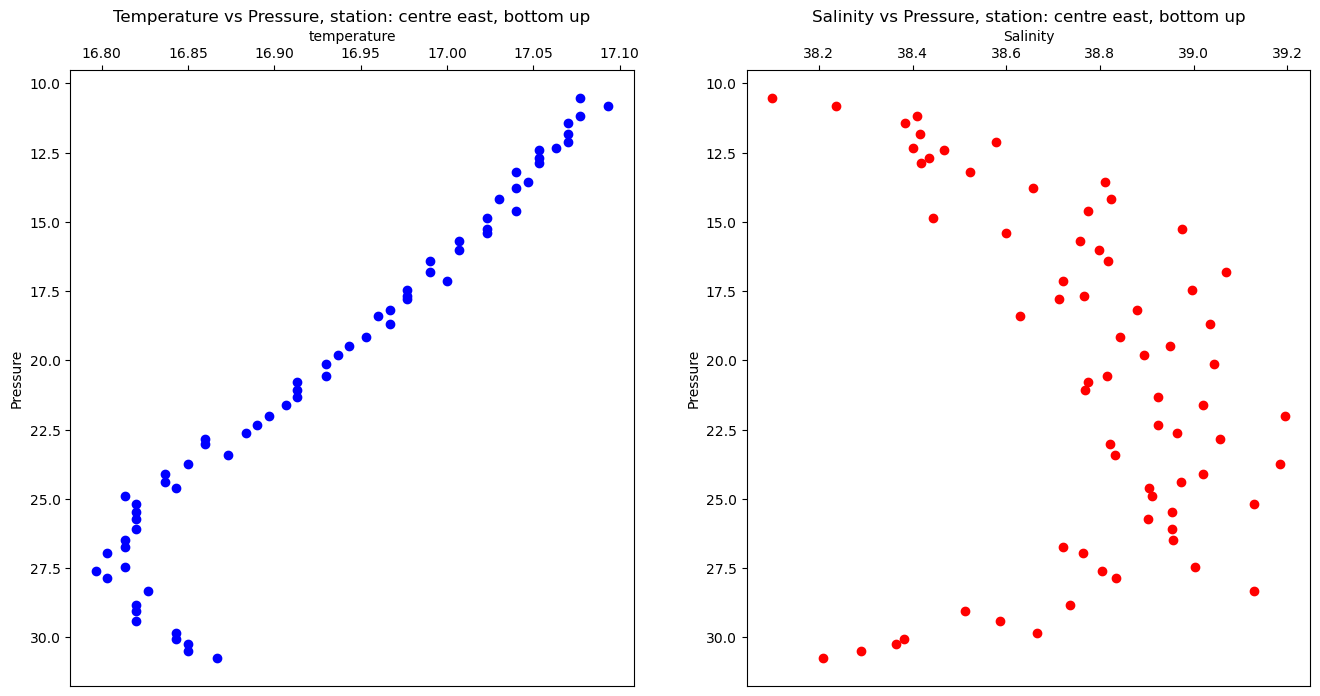

In [120]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

temp_data = c_east_bottom_up['Temperature']
salinity_data = c_east_bottom_up['Salinity']


pressure_data = c_east_bottom_up['Pressure']

axs[0].scatter(temp_data, pressure_data, color='blue')
axs[0].set_xlabel('temperature')
axs[0].set_ylabel('Pressure')
axs[0].yaxis.set_ticks_position('left')  
axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].invert_yaxis()
axs[0].set_title('Temperature vs Pressure, station: centre east, bottom up')


axs[1].scatter(salinity_data, pressure_data, color='red')
axs[1].set_xlabel('Salinity')
axs[1].set_ylabel('Pressure')
axs[1].yaxis.set_ticks_position('left')  
axs[1].xaxis.set_ticks_position('top')
axs[1].xaxis.set_label_position('top')  
axs[1].invert_yaxis()
axs[1].set_title('Salinity vs Pressure, station: centre east, bottom up')


plt.show()

In [ ]:
# Temperature too low here, but the size of the interval is more or less right, just shifted down 0.2 ish..and Salinity is wayyyy to high. 

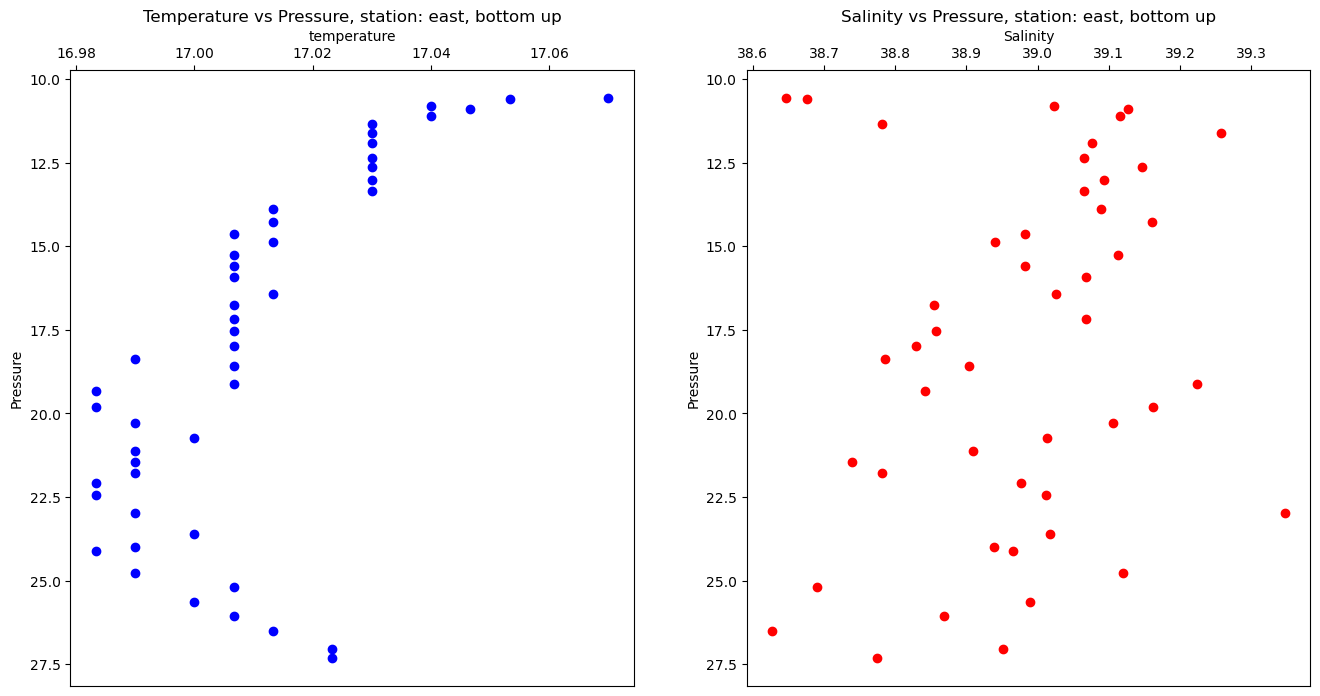

In [121]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

temp_data = east_bottom_up['Temperature']
salinity_data = east_bottom_up['Salinity']


pressure_data = east_bottom_up['Pressure']

axs[0].scatter(temp_data, pressure_data, color='blue')
axs[0].set_xlabel('temperature')
axs[0].set_ylabel('Pressure')
axs[0].yaxis.set_ticks_position('left')  
axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].invert_yaxis()
axs[0].set_title('Temperature vs Pressure, station: east, bottom up')


axs[1].scatter(salinity_data, pressure_data, color='red')
axs[1].set_xlabel('Salinity')
axs[1].set_ylabel('Pressure')
axs[1].yaxis.set_ticks_position('left')  
axs[1].xaxis.set_ticks_position('top')
axs[1].xaxis.set_label_position('top')  
axs[1].invert_yaxis()
axs[1].set_title('Salinity vs Pressure, station: east, bottom up')


plt.show()

In [ ]:
# EAST: Temperature has basically no vertical profile, is very weird. # salintiy is way too high and all over the place!


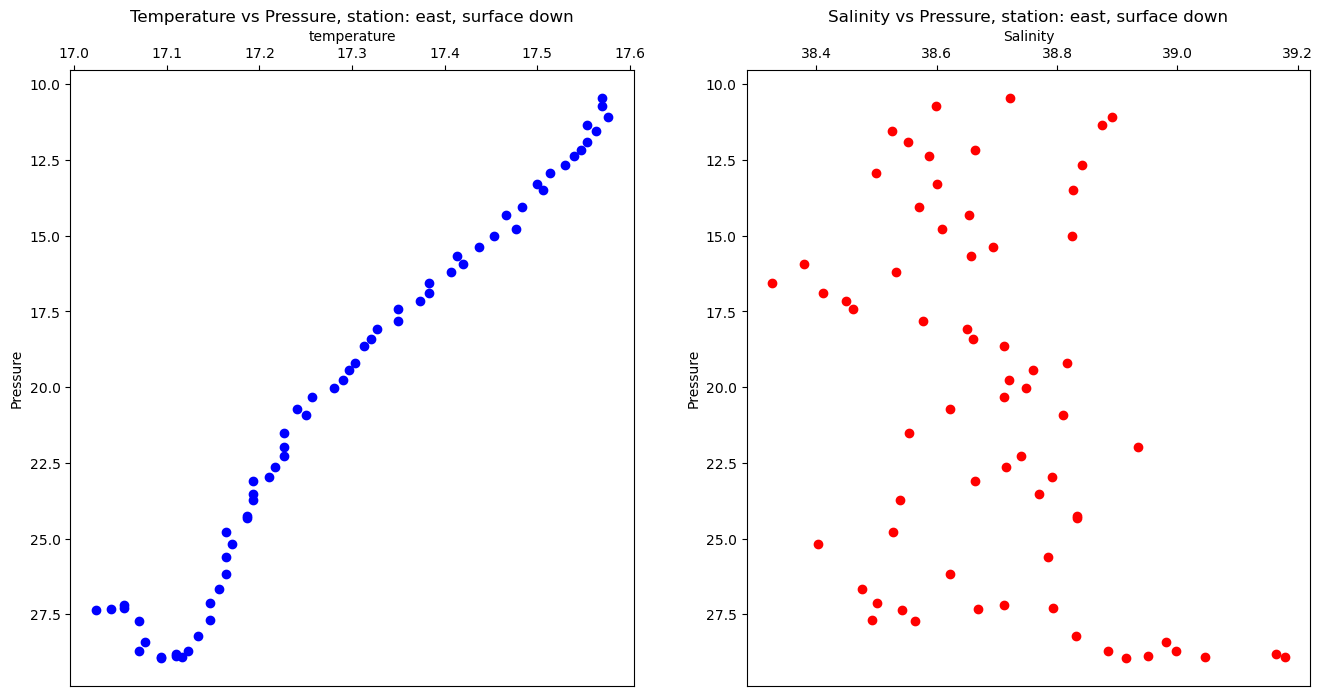

In [122]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

temp_data = east_surface_down['Temperature']
salinity_data = east_surface_down['Salinity']


pressure_data = east_surface_down['Pressure']

axs[0].scatter(temp_data, pressure_data, color='blue')
axs[0].set_xlabel('temperature')
axs[0].set_ylabel('Pressure')
axs[0].yaxis.set_ticks_position('left')  
axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].invert_yaxis()
axs[0].set_title('Temperature vs Pressure, station: east, surface down')


axs[1].scatter(salinity_data, pressure_data, color='red')
axs[1].set_xlabel('Salinity')
axs[1].set_ylabel('Pressure')
axs[1].yaxis.set_ticks_position('left')  
axs[1].xaxis.set_ticks_position('top')
axs[1].xaxis.set_label_position('top')  
axs[1].invert_yaxis()
axs[1].set_title('Salinity vs Pressure, station: east, surface down')


plt.show()

In [ ]:
# Temerature - better, but a bit too high at the surface. Salinity is again way too high. 

In [136]:
# now i want to see hwats going on over time, to see what the strange constant temp/changing pressure things are:

In [ ]:
# convert timestamp to date and time for easier temporal plotting 

east_bottom_up['TimeStamp'] = pd.to_datetime(east_bottom_up['TimeStamp'])

east_bottom_up['Date'] = east_bottom_up['TimeStamp'].dt.strftime('%Y-%m-%d')
east_bottom_up['Time'] = east_bottom_up['TimeStamp'].dt.strftime('%H:%M:%S')

##

c_east_bottom_up['TimeStamp'] = pd.to_datetime(c_east_bottom_up['TimeStamp'])

c_east_bottom_up['Date'] = c_east_bottom_up['TimeStamp'].dt.strftime('%Y-%m-%d')
c_east_bottom_up['Time'] = c_east_bottom_up['TimeStamp'].dt.strftime('%H:%M:%S')

##

c_east_surface_down['TimeStamp'] = pd.to_datetime(c_east_surface_down['TimeStamp'])

c_east_surface_down['Date'] = c_east_surface_down['TimeStamp'].dt.strftime('%Y-%m-%d')
c_east_surface_down['Time'] = c_east_surface_down['TimeStamp'].dt.strftime('%H:%M:%S')

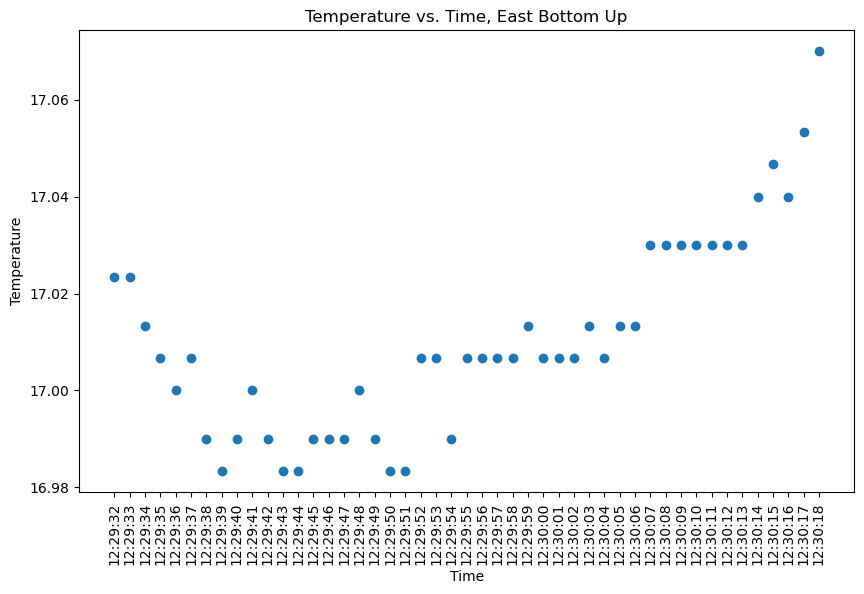

In [143]:
fig, ax = plt.subplots(figsize=(10, 6))  # to adjust size
ax.scatter(east_bottom_up['Time'], east_bottom_up['Temperature'])
plt.xticks(rotation=90)

ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature vs. Time, East Bottom Up')

plt.show()

# look at i.e. 12:30:07 - 12:30:14: pressure is still constantly droppping there, but temp is extremely constant. instrument error? 

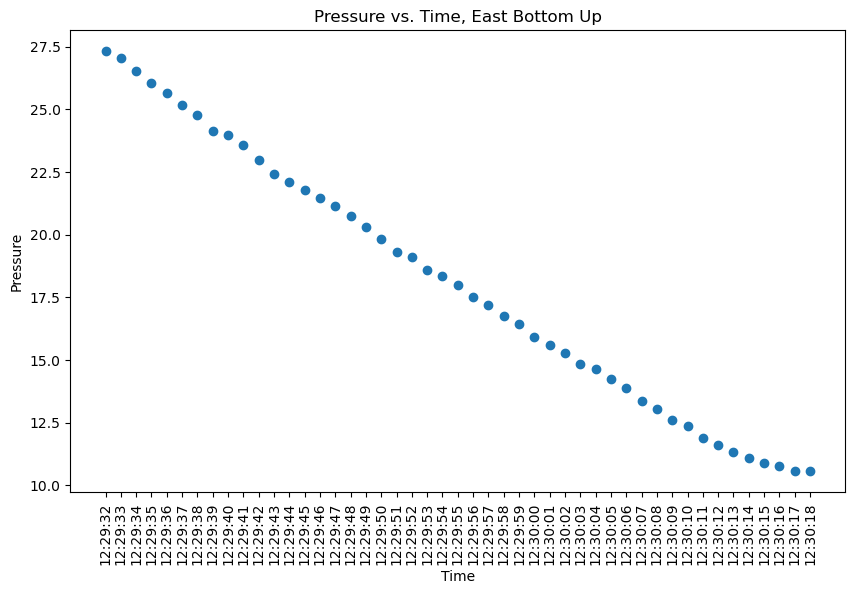

In [144]:
fig, ax = plt.subplots(figsize=(10, 6))  # to adjust size
ax.scatter(east_bottom_up['Time'], east_bottom_up['Pressure'])
plt.xticks(rotation=90)

ax.set_xlabel('Time')
ax.set_ylabel('Pressure')
ax.set_title('Pressure vs. Time, East Bottom Up')

plt.show()

 # pretty nice constant drop!

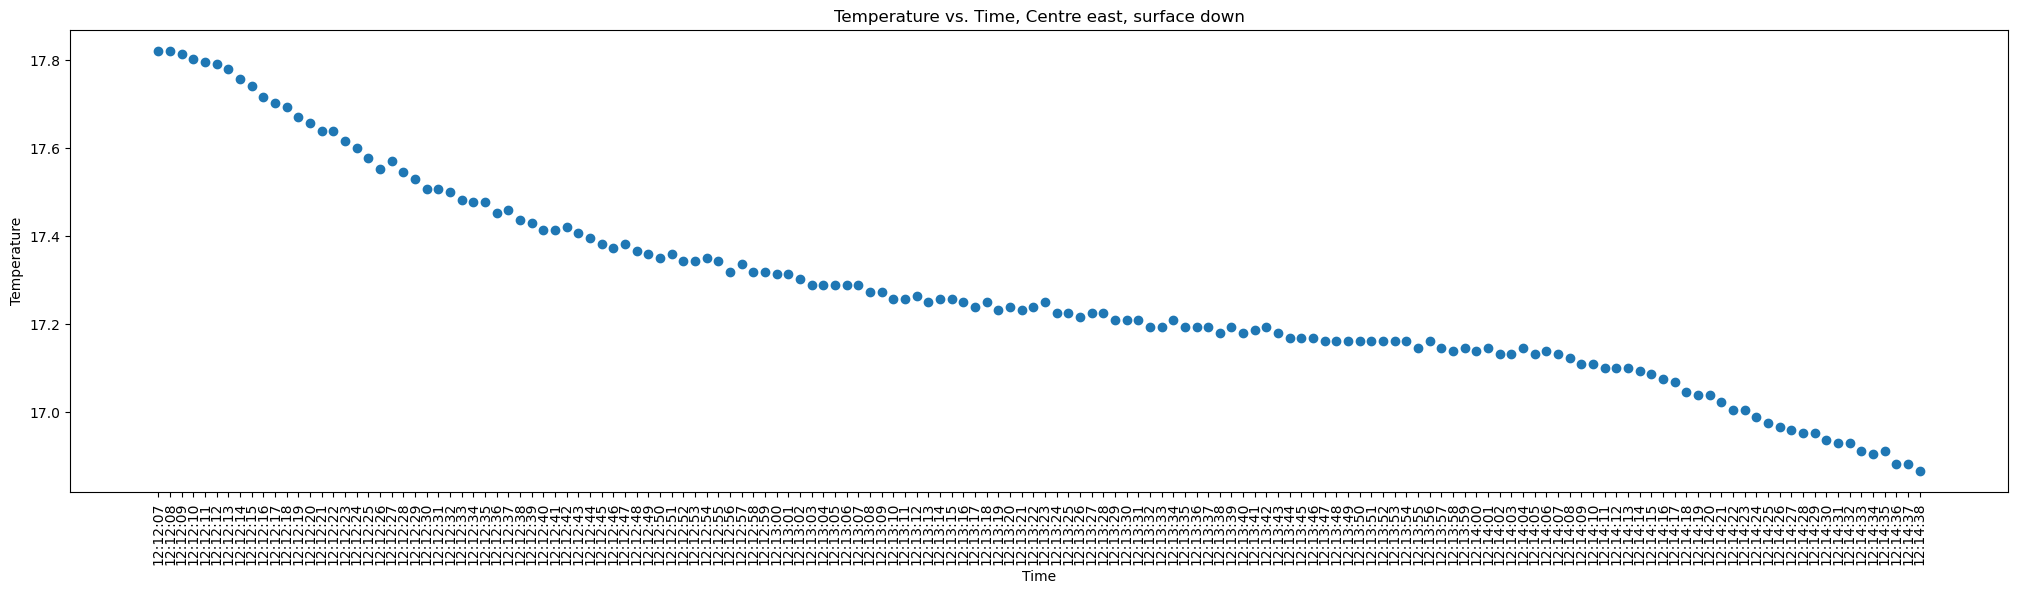

In [151]:
fig, ax = plt.subplots(figsize=(25, 6))  # to adjust size
ax.scatter(c_east_surface_down['Time'], c_east_surface_down['Temperature'])
plt.xticks(rotation=90)

ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature vs. Time, Centre east, surface down')

plt.show()


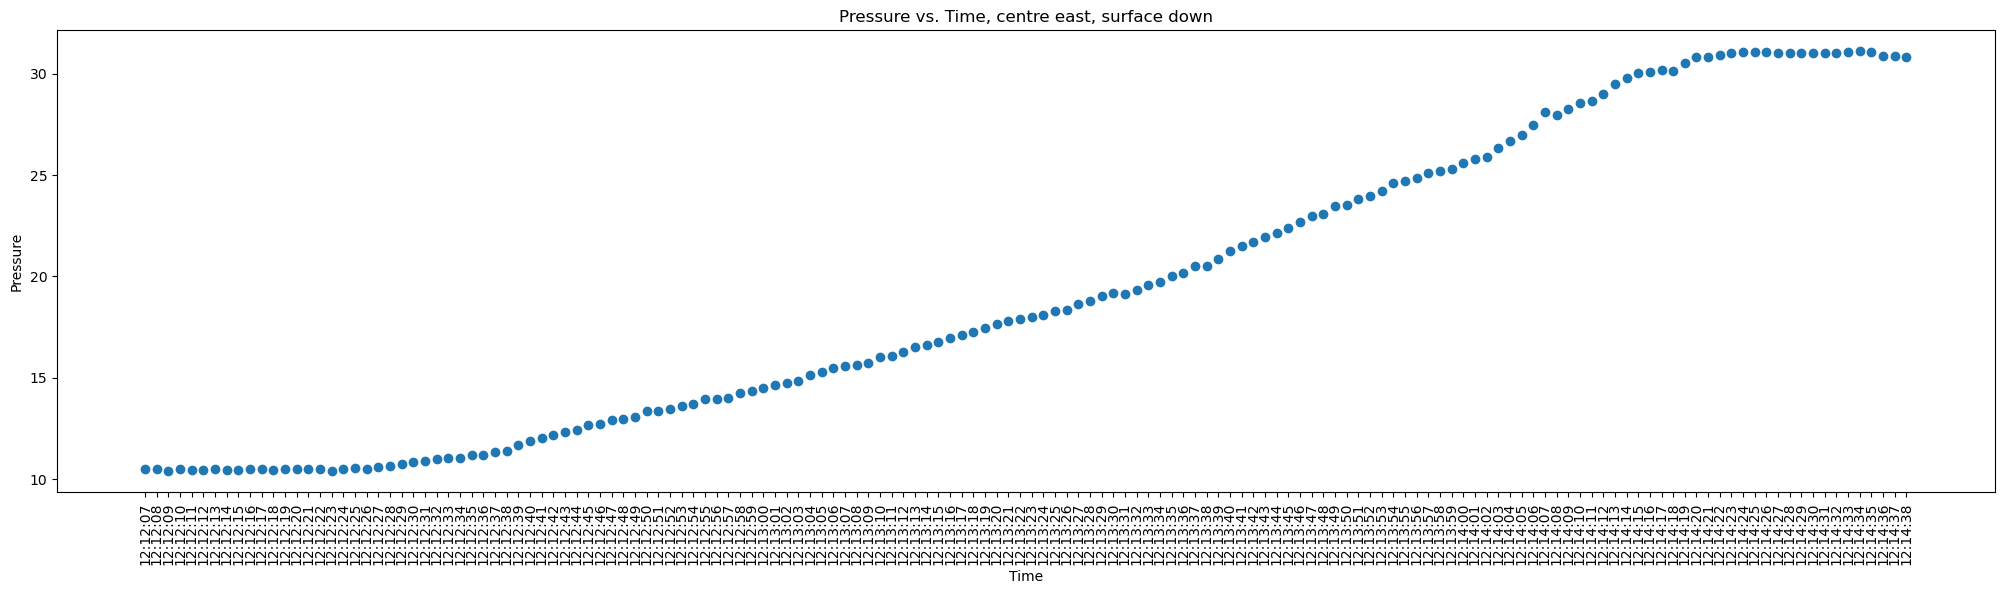

In [154]:
fig, ax = plt.subplots(figsize=(25, 6))  # to adjust size
ax.scatter(c_east_surface_down['Time'], c_east_surface_down['Pressure'])
plt.xticks(rotation=90)

ax.set_xlabel('Time')
ax.set_ylabel('Pressure')
ax.set_title('Pressure vs. Time, centre east, surface down')

plt.show()

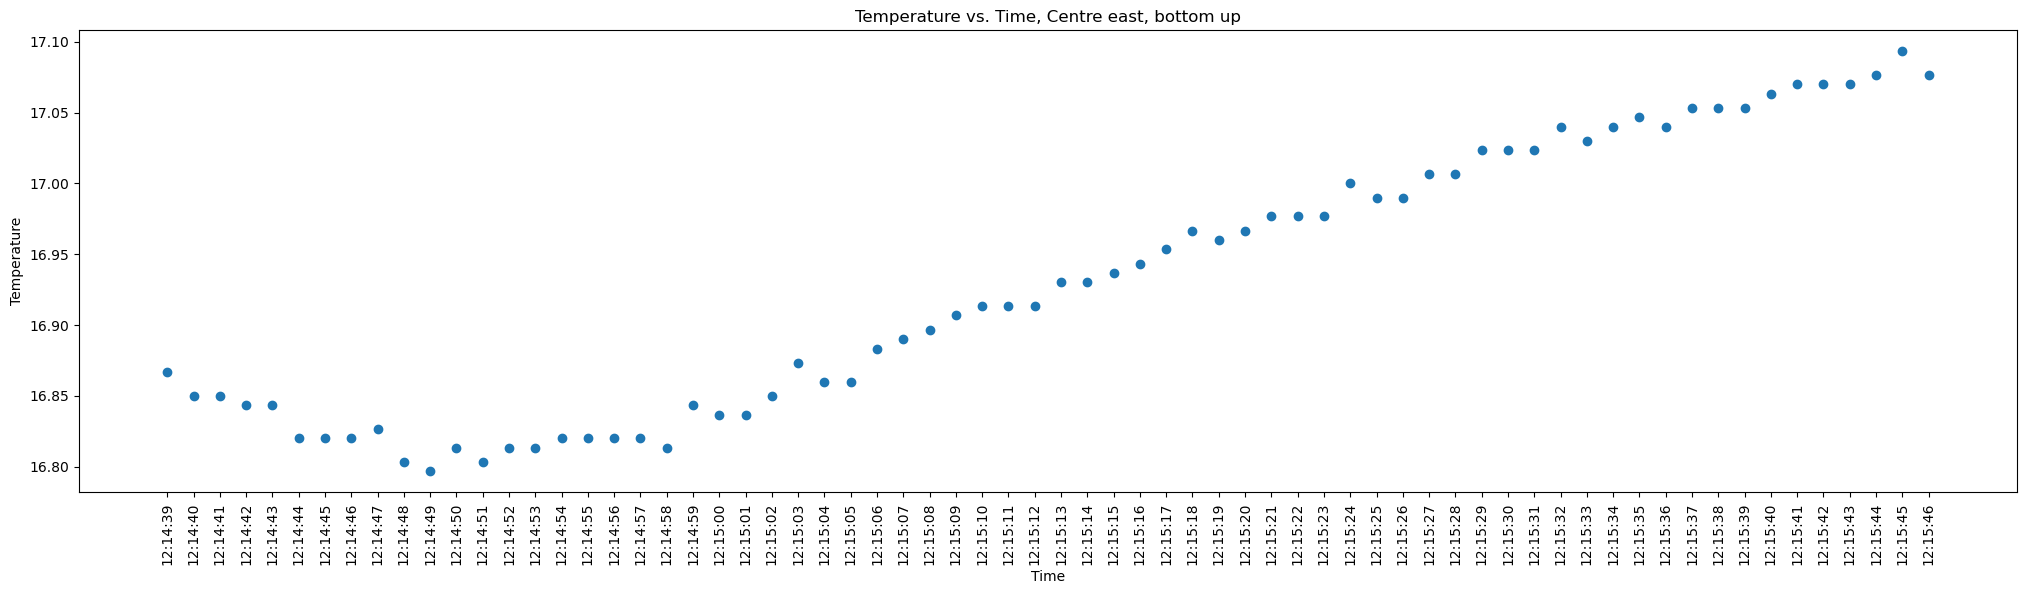

In [156]:
fig, ax = plt.subplots(figsize=(25, 6))  # to adjust size
ax.scatter(c_east_bottom_up['Time'], c_east_bottom_up['Temperature'])
plt.xticks(rotation=90)

ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature vs. Time, Centre east, bottom up')

plt.show()


In [ ]:
# these plots seem to suggest that if the sensor is pulled up too quickly (i.e. in the case of station East, bottom up), the it creates weird points where the sensor gives contant temperature over time . 
# probably is too quick and cant calibrate properly ? Manual doesnt seem to say much about it...

In [ ]:
# so theres definitely some pretty funky stuff going on, especially with salinity. Lets download some S3data to comapre with some CTD data that was taken on 12.09.2023 , to see if the vlaidtion works, and what is reliable:

In [13]:
sept23dir= 'C:/Users/a86963/Documents/data/ctd/12sept2023/'

In [14]:
os.listdir(sept23dir)

['2023_09_12_C.EAST_compensated.txt',
 '2023_09_12_C.WEST_compensated.txt',
 '2023_09_12_EAST_compensated.txt',
 '2023_09_12_WEST_compensated.txt',
 'VEI_X5733_2023_09_12_C.EAST_compensated.xlsx',
 'VEI_X5733_2023_09_12_C.WEST_compensated.xlsx',
 'VEI_X5733_2023_09_12_EAST_compensated.xlsx',
 'VEI_X5733_2023_09_12_WEST_compensated.xlsx']

In [16]:
# in situ data for the same stations, from Sonia; Bruno took the readings (i think?) 
c_east_12sept23_insitu = pd.read_csv('C:/Users/a86963/Documents/data/ctd/12sept2023/2023_09_12_C.EAST_compensated.txt', sep="\t") 
east_12sept23_insitu = pd.read_csv('C:/Users/a86963/Documents/data/ctd/12sept2023/2023_09_12_EAST_compensated.txt', sep="\t") 
west_12sept23_insitu = pd.read_csv('C:/Users/a86963/Documents/data/ctd/12sept2023/2023_09_12_WEST_compensated.txt', sep="\t") 
c_west_12sept23_insitu = pd.read_csv('C:/Users/a86963/Documents/data/ctd/12sept2023/2023_09_12_C.WEST_compensated.txt', sep="\t") 

In [ ]:
# split into bottom up/top down! 

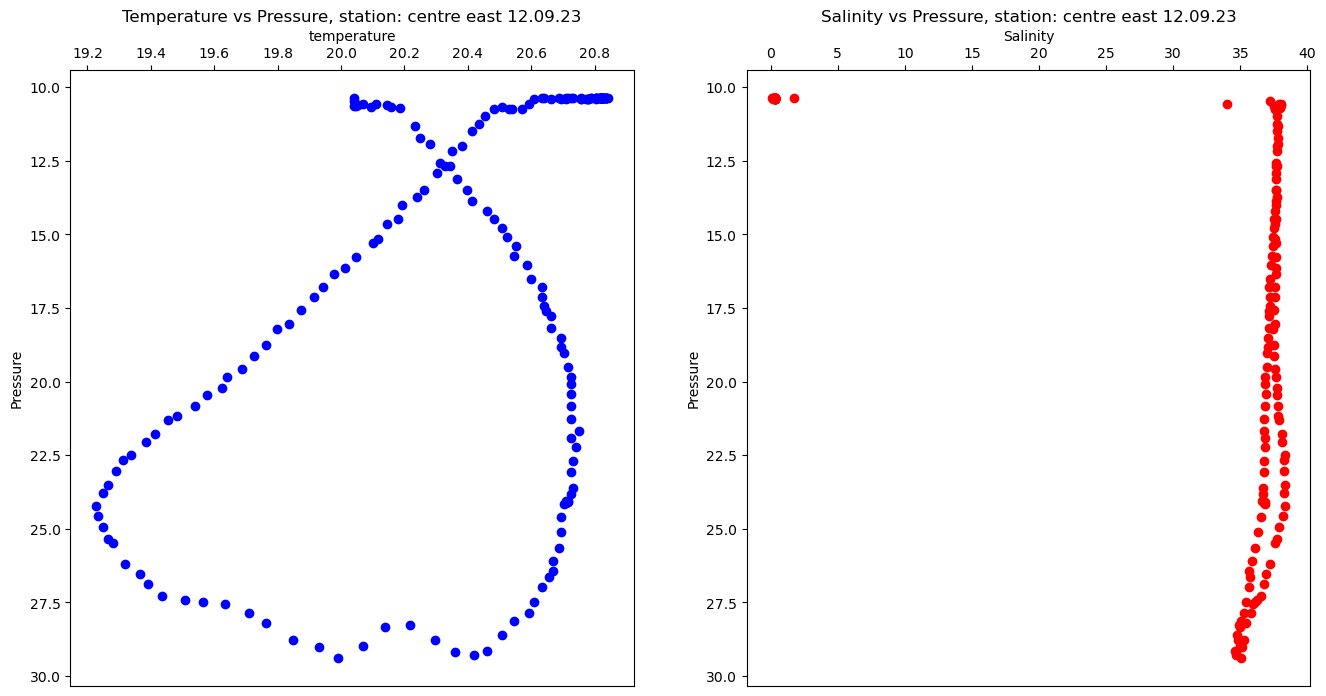

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

temp_data = c_east_12sept23_insitu['Temperature']
salinity_data = c_east_12sept23_insitu['Salinity']


pressure_data = c_east_12sept23_insitu['Pressure']

axs[0].scatter(temp_data, pressure_data, color='blue')
axs[0].set_xlabel('temperature')
axs[0].set_ylabel('Pressure')
axs[0].yaxis.set_ticks_position('left')  
axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].invert_yaxis()
axs[0].set_title('Temperature vs Pressure, station: centre east 12.09.23')


axs[1].scatter(salinity_data, pressure_data, color='red')
axs[1].set_xlabel('Salinity')
axs[1].set_ylabel('Pressure')
axs[1].yaxis.set_ticks_position('left')  
axs[1].xaxis.set_ticks_position('top')
axs[1].xaxis.set_label_position('top')  
axs[1].invert_yaxis()
axs[1].set_title('Salinity vs Pressure, station: centre east 12.09.23')


plt.show()

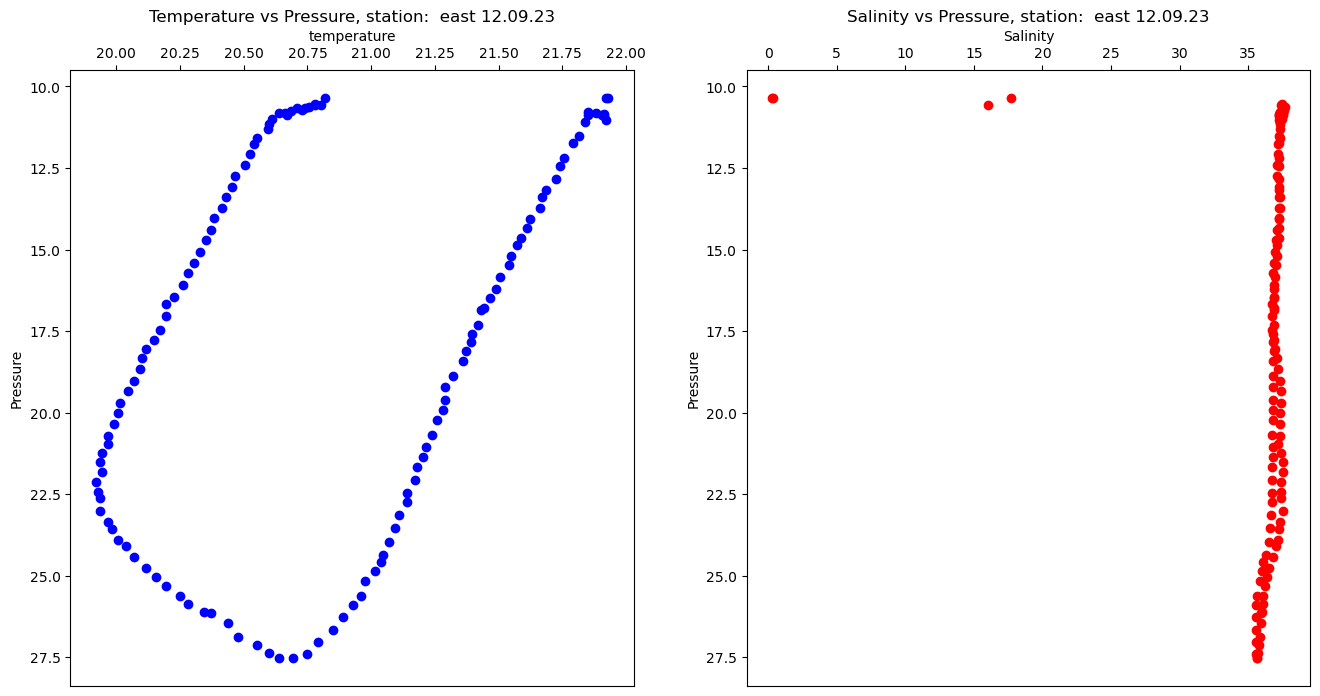

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

temp_data = east_12sept23_insitu['Temperature']
salinity_data = east_12sept23_insitu['Salinity']


pressure_data = east_12sept23_insitu['Pressure']

axs[0].scatter(temp_data, pressure_data, color='blue')
axs[0].set_xlabel('temperature')
axs[0].set_ylabel('Pressure')
axs[0].yaxis.set_ticks_position('left')  
axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].invert_yaxis()
axs[0].set_title('Temperature vs Pressure, station:  east 12.09.23')


axs[1].scatter(salinity_data, pressure_data, color='red')
axs[1].set_xlabel('Salinity')
axs[1].set_ylabel('Pressure')
axs[1].yaxis.set_ticks_position('left')  
axs[1].xaxis.set_ticks_position('top')
axs[1].xaxis.set_label_position('top')  
axs[1].invert_yaxis()
axs[1].set_title('Salinity vs Pressure, station:  east 12.09.23')


plt.show()

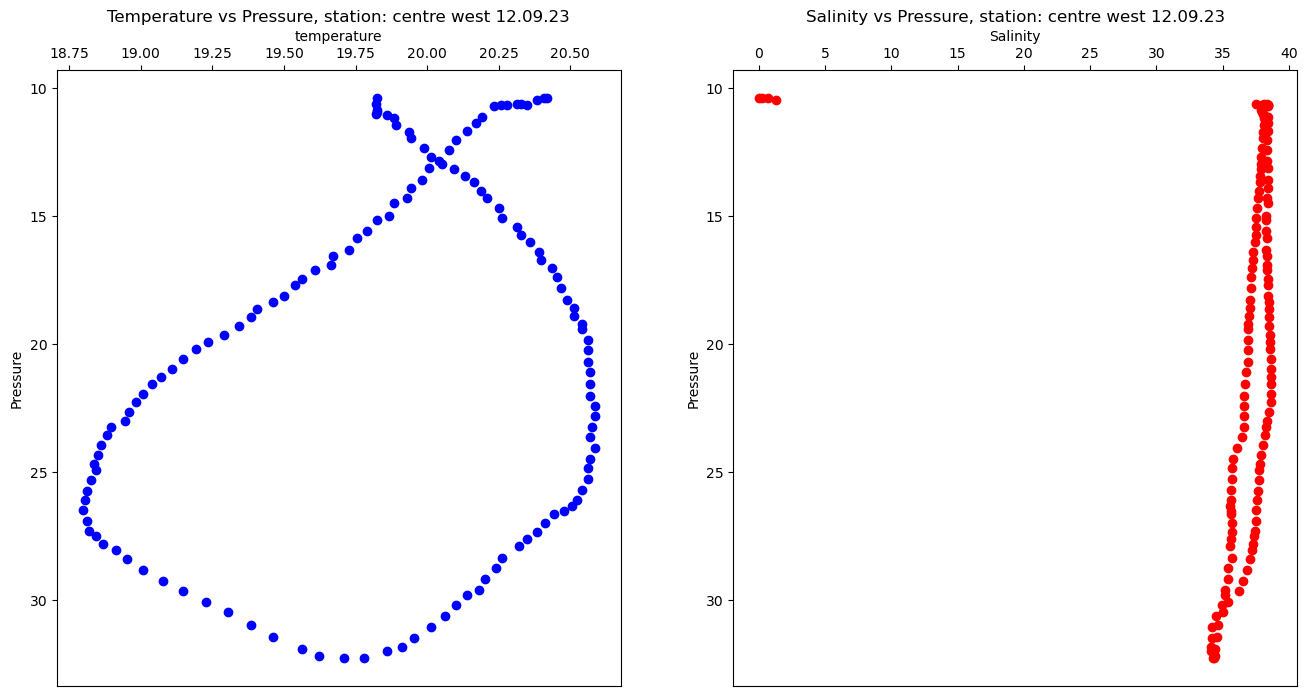

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

temp_data = c_west_12sept23_insitu['Temperature']
salinity_data = c_west_12sept23_insitu['Salinity']


pressure_data = c_west_12sept23_insitu['Pressure']

axs[0].scatter(temp_data, pressure_data, color='blue')
axs[0].set_xlabel('temperature')
axs[0].set_ylabel('Pressure')
axs[0].yaxis.set_ticks_position('left')  
axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].invert_yaxis()
axs[0].set_title('Temperature vs Pressure, station: centre west 12.09.23')


axs[1].scatter(salinity_data, pressure_data, color='red')
axs[1].set_xlabel('Salinity')
axs[1].set_ylabel('Pressure')
axs[1].yaxis.set_ticks_position('left')  
axs[1].xaxis.set_ticks_position('top')
axs[1].xaxis.set_label_position('top')  
axs[1].invert_yaxis()
axs[1].set_title('Salinity vs Pressure, station: centre west 12.09.23')


plt.show()

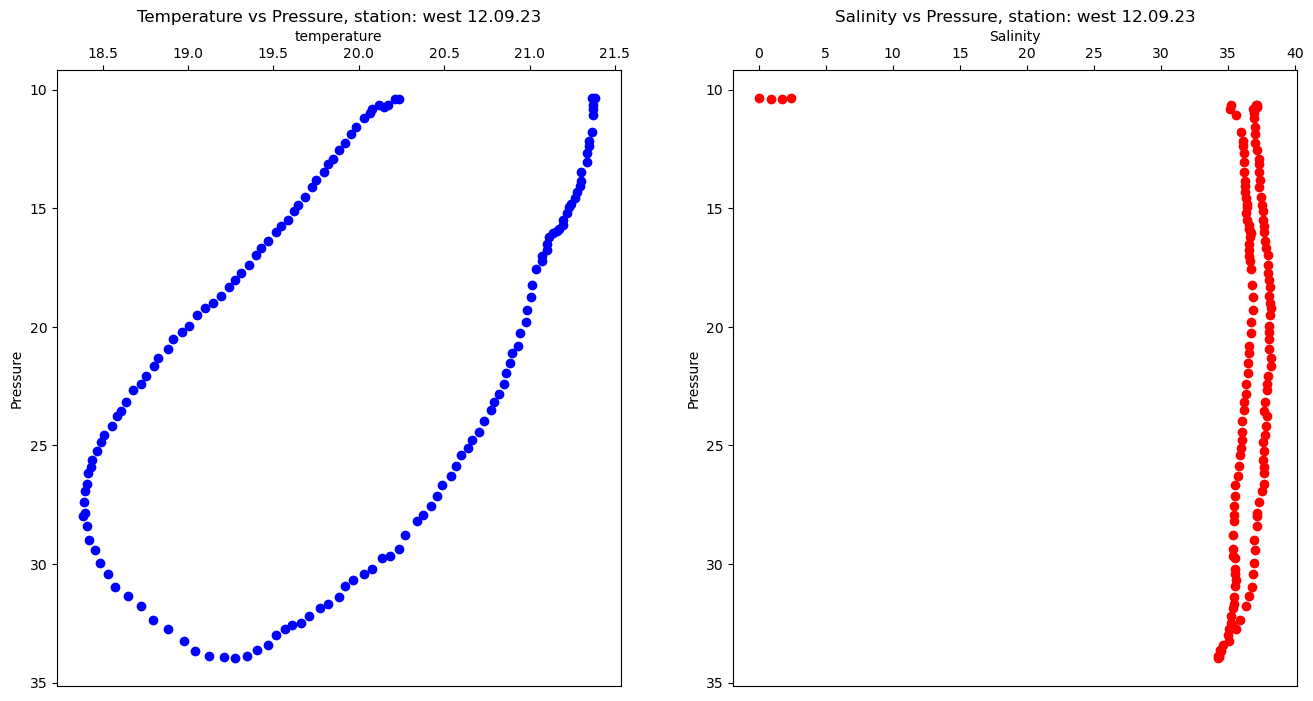

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

temp_data = west_12sept23_insitu['Temperature']
salinity_data = west_12sept23_insitu['Salinity']


pressure_data = west_12sept23_insitu['Pressure']

axs[0].scatter(temp_data, pressure_data, color='blue')
axs[0].set_xlabel('temperature')
axs[0].set_ylabel('Pressure')
axs[0].yaxis.set_ticks_position('left')  
axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].invert_yaxis()
axs[0].set_title('Temperature vs Pressure, station: west 12.09.23')


axs[1].scatter(salinity_data, pressure_data, color='red')
axs[1].set_xlabel('Salinity')
axs[1].set_ylabel('Pressure')
axs[1].yaxis.set_ticks_position('left')  
axs[1].xaxis.set_ticks_position('top')
axs[1].xaxis.set_label_position('top')  
axs[1].invert_yaxis()
axs[1].set_title('Salinity vs Pressure, station: west 12.09.23')


plt.show()

In [24]:
# from snap, SST:
# in K, so making it in celcius
west_12sept23_temp = 293.91 - 273.15
c_west_12sept23_temp = 293.91 - 273.15
c_east_12sept23_temp = 294.49- 273.15
east_12sept23_temp = 294.49- 273.15

In [23]:
surface_pressure = east_12sept23_insitu['Pressure'][0] # surface pressure is approx 10.353

Text(0.5, 1.0, 'Temperature vs Pressure, station: centre east 12.09.23')

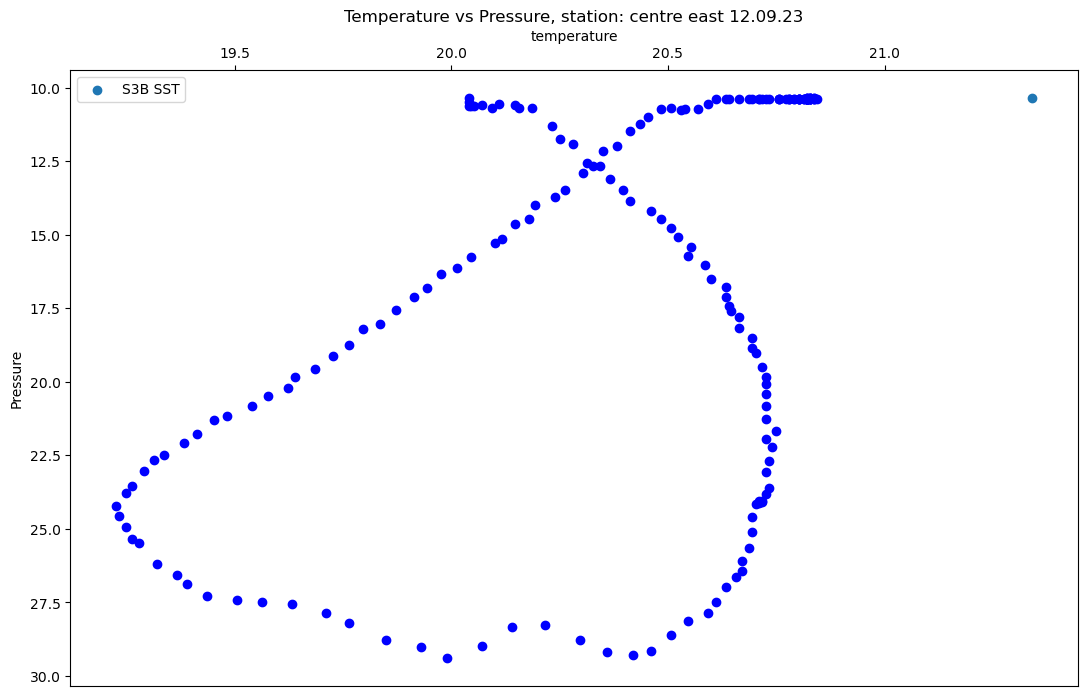

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))

temp_data = c_east_12sept23_insitu['Temperature']
salinity_data = c_east_12sept23_insitu['Salinity']


pressure_data = c_east_12sept23_insitu['Pressure']

ax.scatter(temp_data, pressure_data, color='blue')
ax.scatter(c_east_12sept23_temp, surface_pressure, label = 'S3B SST')
ax.set_xlabel('temperature')
ax.set_ylabel('Pressure')
ax.yaxis.set_ticks_position('left')  
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.legend()
ax.invert_yaxis()
ax.set_title('Temperature vs Pressure, station: centre east 12.09.23')

Text(0.5, 1.0, 'Temperature vs Pressure, station: east 12.09.23')

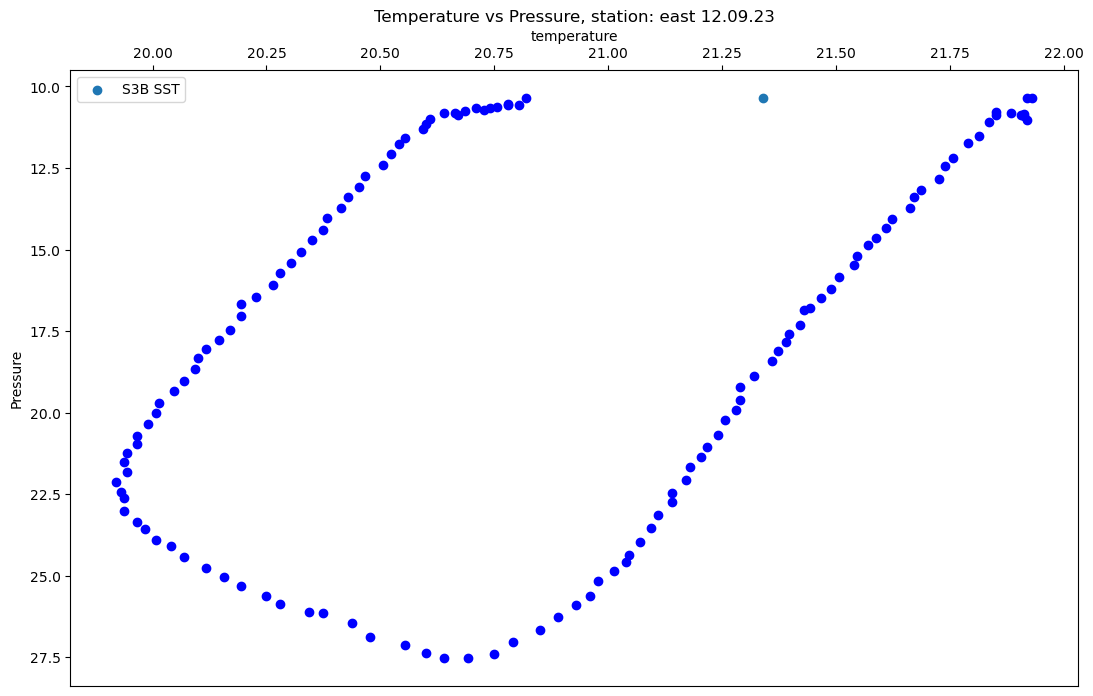

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))

temp_data = east_12sept23_insitu['Temperature']
salinity_data = east_12sept23_insitu['Salinity']


pressure_data = east_12sept23_insitu['Pressure']

ax.scatter(temp_data, pressure_data, color='blue')
ax.scatter(east_12sept23_temp, surface_pressure, label = 'S3B SST')
ax.set_xlabel('temperature')
ax.set_ylabel('Pressure')
ax.yaxis.set_ticks_position('left')  
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.legend()
ax.invert_yaxis()
ax.set_title('Temperature vs Pressure, station: east 12.09.23')

Text(0.5, 1.0, 'Temperature vs Pressure, station: west 12.09.23')

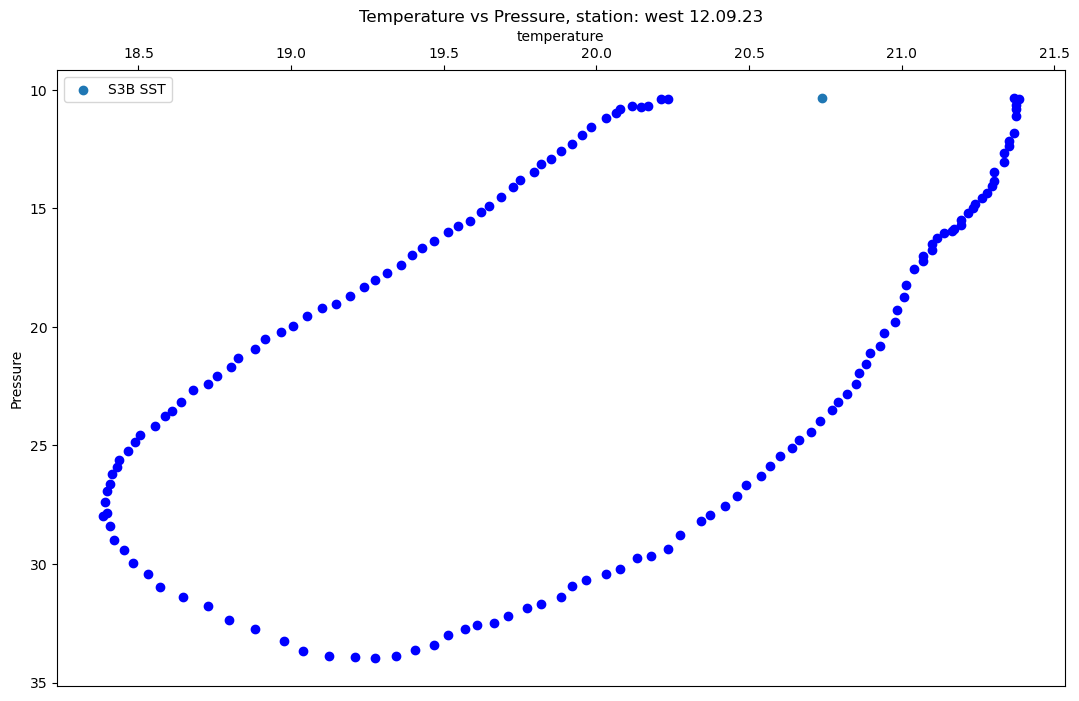

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))

temp_data = west_12sept23_insitu['Temperature']
salinity_data = west_12sept23_insitu['Salinity']


pressure_data = west_12sept23_insitu['Pressure']

ax.scatter(temp_data, pressure_data, color='blue')
ax.scatter(west_12sept23_temp, surface_pressure, label = 'S3B SST')
ax.set_xlabel('temperature')
ax.set_ylabel('Pressure')
ax.yaxis.set_ticks_position('left')  
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.legend()
ax.invert_yaxis()
ax.legend()
ax.set_title('Temperature vs Pressure, station: west 12.09.23')

In [43]:
# lets print is as numbers:

print(f'In situ temperature reading for station East on 12.09.2023: surface down: {east_12sept23_insitu['Temperature'][0]} and bottom up: {east_12sept23_insitu['Temperature'].iloc[-1]}, and the S3B derived SST: {east_12sept23_temp}, at pressure roughly 10.35')

In situ temperature reading for station East on 12.09.2023: surface down: 21.92 and bottom up: 20.82, and the S3B derived SST: 21.340000000000032, at pressure roughly 10.35


In [45]:
print(f'In situ temperature reading for station Centre East on 12.09.2023: surface down: {c_east_12sept23_insitu['Temperature'][0]} C and bottom up: {c_east_12sept23_insitu['Temperature'].iloc[-1]}C, and the S3B derived SST: {c_east_12sept23_temp}C, at pressure roughly 10.35')

In situ temperature reading for station Centre East on 12.09.2023: surface down: 20.04 C and bottom up: 20.82C, and the S3B derived SST: 21.340000000000032C, at pressure roughly 10.35


In [50]:
print(f'In situ temperature reading for station West on 12.09.2023: surface down: {west_12sept23_insitu['Temperature'][0]} and bottom up: {west_12sept23_insitu['Temperature'].iloc[-1]}, and the S3B derived SST: {west_12sept23_temp}, at pressure roughly 10.35. \n S3B data for west and centre west are in the same pixel, so the values are the same')

In situ temperature reading for station West on 12.09.2023: surface down: 21.36666667 and bottom up: 20.23333333, and the S3B derived SST: 20.74000000000001, at pressure roughly 10.35. 
 S3B data for west and centre west are in the same pixel, so the values are the same


In [51]:
print(f'In situ temperature reading for station centre West on 12.09.2023: surface down: {c_west_12sept23_insitu['Temperature'][0]} and bottom up: {c_west_12sept23_insitu['Temperature'].iloc[-1]}, and the S3B derived SST: {c_west_12sept23_temp}, at pressure roughly 10.35. \n S3B data for west and centre west are in the same pixel, so the values are the same')

In situ temperature reading for station centre West on 12.09.2023: surface down: 19.82666667 and bottom up: 20.42, and the S3B derived SST: 20.760000000000048, at pressure roughly 10.35. 
 S3B data for west and centre west are in the same pixel, so the values are the same


So from this we can see that none of them match exactly, but some of the satellite readings are more or less in between the insitu data. it is also strange that the insitu data has different values depending on the direction of the reading. this could be due to the sensor being put into the water striaght from the air, and may mess up the reading. I couldnt find anythign in the manual about this, but its worth trying on the next field trip to let the sensor equilibriate in the water before taking the readings. 

It could also be due to different people taking the measurements; in the case of the field work from 19.04.2024, 4 different people took each measurement. this was good for everyone getting to practice and experience the equipment, but of course this also means that everyone has different speeds and methods of lowering and raising the sensor. This is also important for the next field trip: that only one person takes the measurements. Also, that the start and end time of the measurement is recorded in the log book. 

To see this, I compared the length of each dataset - 12.09.2023 and 19.04.2024 - to see the lengths of the datasets (since the sensor measures once a second, the length of the dataset indicates the time of measuring). 

In [56]:
print(len(c_west_12sept23_insitu['TimeStamp']), len(west_12sept23_insitu['TimeStamp']), len(east_12sept23_insitu['TimeStamp']), len(c_east_12sept23_insitu['TimeStamp']))

140 146 129 194


In [58]:
print(len(ds_west['TimeStamp']), len(ds_c_west['TimeStamp']), len(ds_c_east['TimeStamp']), len(ds_east['TimeStamp']))

325 443 255 127


We can see that the data from 12.09.2023 is much more consistent than that of 19.04.2024